### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading data

In [2]:
Data_Train = pd.read_excel('Data_Train.xlsx')

In [3]:
Data_Test = pd.read_excel('Test_set.xlsx')

In [4]:
df_train = Data_Train.copy()
df_test = Data_Test.copy()

In [5]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


### Initial Exploration

In [7]:
df_train.shape

(10683, 11)

In [8]:
df_test.shape

(2671, 10)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### The train data has 10 input features and one target feature,'Price'

#### All features are object type except the target feature which is a numerical feature

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


### The test data has 10 input features

In [11]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### The training data has no missing values

In [12]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

#### The testing data has no missing values

In [13]:
df_train.duplicated().sum()

220

#### The training data has 220 duplicate values but we are keeping them as it is and not removing them

In [14]:
df_test.duplicated().sum()

26

#### The testing data has 26 duplicate values but we are keeping them as well instead of removing

In [15]:
df_train[df_train.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [16]:
df_test[df_test.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
294,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,No info
794,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,In-flight meal not included
909,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,20:00,22:55,2h 55m,non-stop,No info
974,Air India,12/06/2019,Kolkata,Banglore,CCU → DEL → AMD → BLR,07:00,05:25 13 Jun,22h 25m,2 stops,No info
1011,Jet Airways,9/05/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 10 May,22h 55m,2 stops,No info
1033,Multiple carriers,15/05/2019,Delhi,Cochin,DEL → BOM → COK,07:30,19:15,11h 45m,1 stop,No info
1044,GoAir,24/03/2019,Banglore,New Delhi,BLR → DEL,20:55,23:50,2h 55m,non-stop,No info
1233,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,No info
1504,Air India,15/06/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 16 Jun,21h 15m,2 stops,No info
1537,Jet Airways,6/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,06:45,04:25 07 Jun,21h 40m,2 stops,In-flight meal not included


## Exploratory Data analysis and Data Cleaning

### Total_stops

In [17]:
print(df_train['Total_Stops'].value_counts())
print("-"*30)
print("Total no. of categories in Total-stops:",len(df_train['Total_Stops'].value_counts()))

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64
------------------------------
Total no. of categories in Total-stops: 5


<Axes: >

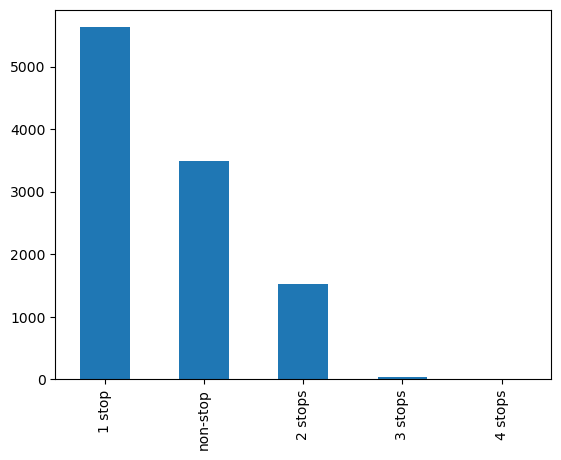

In [18]:
#Barplot for value counts
df_train['Total_Stops'].value_counts().plot(kind='bar')

In [19]:
# Verify if there are any missing values in 'Total_Stops' for training data
print(df_train['Total_Stops'].isnull().sum())


1


### Droping missing values in Total_Stops

In [20]:
# Drop rows where 'Total_Stops' is missing
df_train = df_train.dropna(subset=['Total_Stops'])

# Verify if there are any missing values left in 'Total_Stops'
print(df_train['Total_Stops'].isnull().sum())


0


In [21]:
# Verify if there are any missing values in 'Total_Stops' in testing data
print(df_test['Total_Stops'].isnull().sum())


0


In [22]:
# Drop rows where 'Total_Stops' is missing
df_test = df_test.dropna(subset=['Total_Stops'])

# Verify if there are any missing values left in 'Total_Stops'
print(df_test['Total_Stops'].isnull().sum())


0


In [23]:
# Replace 'non-stop' with '0 stop' in 'Total_Stops' for training data
df_train['Total_Stops'] = df_train['Total_Stops'].replace('non-stop', '0 stop')

# Verify the replacement
print(df_train['Total_Stops'].unique())


['0 stop' '2 stops' '1 stop' '3 stops' '4 stops']


In [24]:
# Replace 'non-stop' with '0 stop' in 'Total_Stops' for testing data
df_test['Total_Stops'] = df_test['Total_Stops'].replace('non-stop', '0 stop')

# Verify the replacement
print(df_test['Total_Stops'].unique())


['1 stop' '0 stop' '2 stops' '3 stops' '4 stops']


In [25]:
# Remove 'stop' and 'stops' from the 'Total_Stops' column for training data
df_train['Total_Stops'] = df_train['Total_Stops'].str.replace(' stop','', regex=False).str.replace(' stops','', regex=False)

# Convert the resulting values to integers
df_train['Total_Stops'] = df_train['Total_Stops'].str.extract('(\d+)').astype(int)

# Verify the changes
print(df_train['Total_Stops'].unique())


[0 2 1 3 4]


In [26]:
# Remove 'stop' and 'stops' from the 'Total_Stops' column for testing data
df_test['Total_Stops'] = df_test['Total_Stops'].str.replace(' stop','', regex=False).str.replace(' stops','', regex=False)

# Convert the resulting values to integers
df_test['Total_Stops'] = df_test['Total_Stops'].str.extract('(\d+)').astype(int)

# Verify the changes
print(df_test['Total_Stops'].unique())


[1 0 2 3 4]


In [27]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648


In [28]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,0,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1,No info


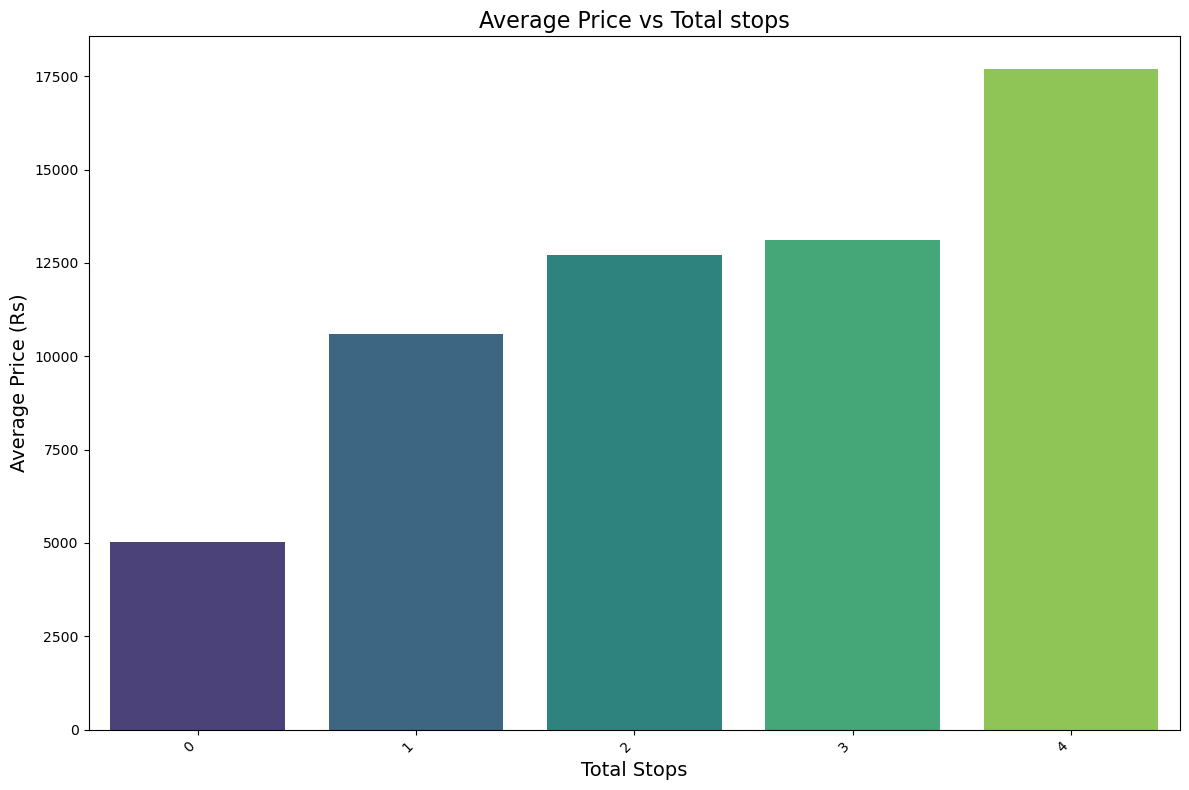

In [29]:
# Calculate mean prices for each stop category
mean_prices = df_train.groupby('Total_Stops')['Price'].mean().reset_index()

# Sort the mean prices in descending order
mean_prices = mean_prices.sort_values(by='Price', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8)) 
sns.barplot(x='Total_Stops', y='Price', data=mean_prices, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Total Stops', fontsize=14)
plt.ylabel('Average Price (Rs)', fontsize=14)
plt.title('Average Price vs Total stops', fontsize=16)
plt.tight_layout()  

# Display the plot
plt.show()


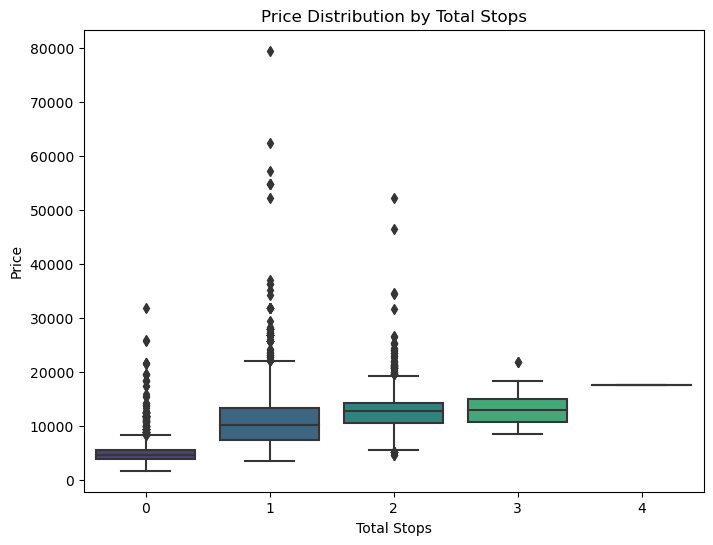

In [30]:
# Box plot to show distribution of Price for each Total_Stops category
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_train, x='Total_Stops', y='Price', palette='viridis')
plt.title('Price Distribution by Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()

#### The starting price of airlines increases with the increasing number of stops, but the variation in prices is seen more with airlines offering 0, 1 or 2 stops.Also there are very few airlines offering 3 and 4 stops. 
#### We can also observe that the price of  1 stop is higher than 2 stops for some airlines.


## Airline

In [31]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

#### There are 12 categories in airline feature in the training data

In [32]:
df_test['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

#### There are 11 categories of airline in the testing data, Trujet is not present

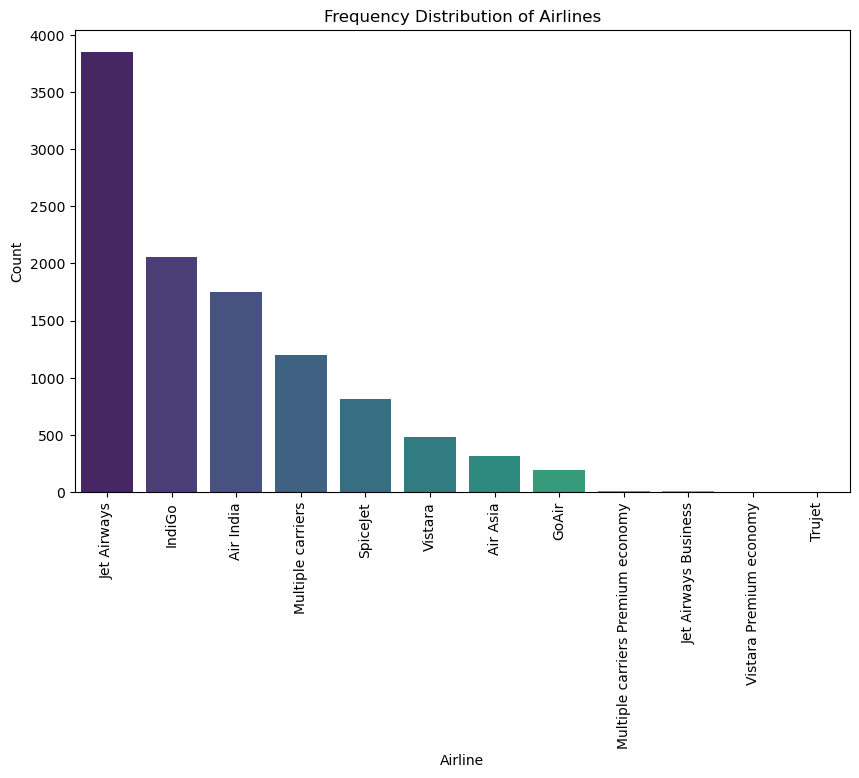

In [33]:
### Finding the most frequent flying airline for training data
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='Airline', order=df_train['Airline'].value_counts().index, palette='viridis')
plt.title('Frequency Distribution of Airlines')
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.show()


#### Jet Airways is the most frequent whereas Trujet just has a single flight

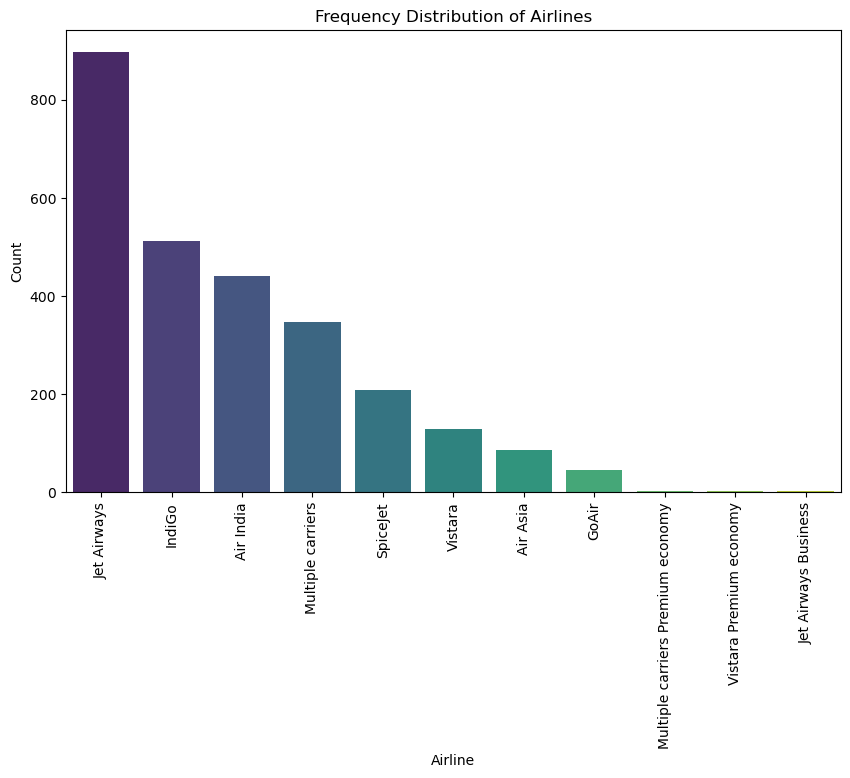

In [34]:
### Finding the most frequent flying airline for testing data
plt.figure(figsize=(10, 6))
sns.countplot(data=df_test, x='Airline', order=df_test['Airline'].value_counts().index, palette='viridis')
plt.title('Frequency Distribution of Airlines')
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.show()


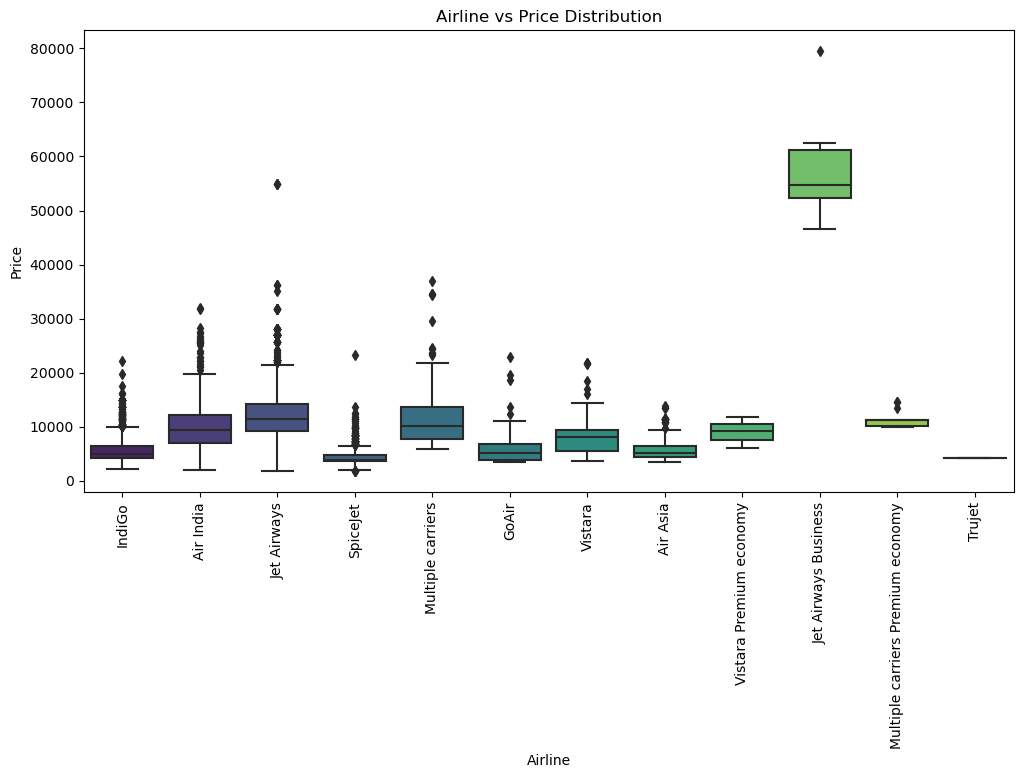

In [35]:
### Finding flight prices for each airline
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, x='Airline', y='Price', palette='viridis')
plt.title('Airline vs Price Distribution')
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()


#### Jet Airways has the maximum range in prices. 
#### Jet Airways Bussiness has just 2 flights priced quite high and thus creates an outlier.

### Merging the categories

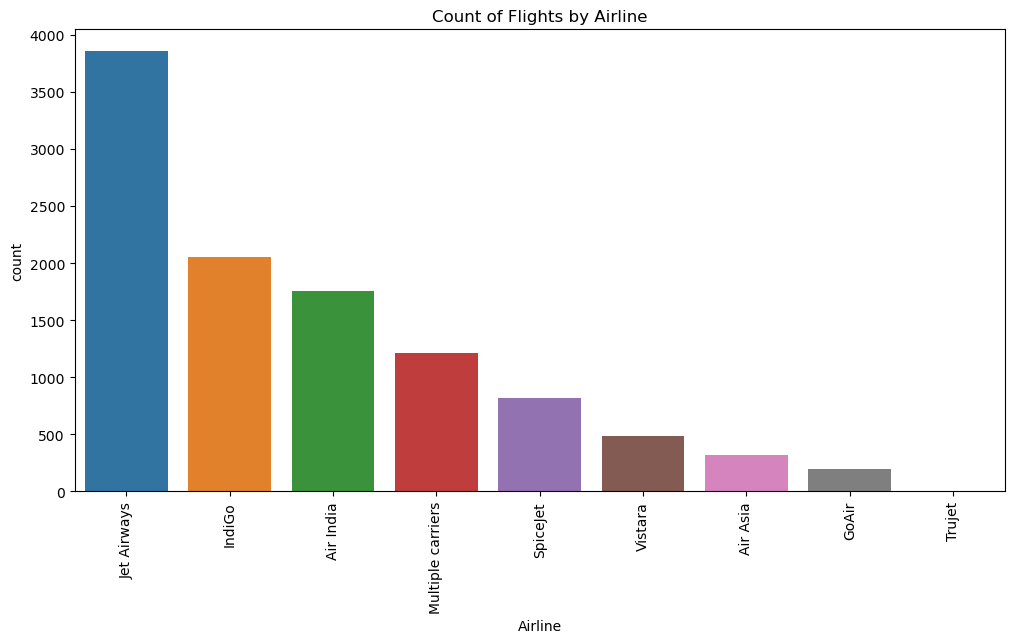

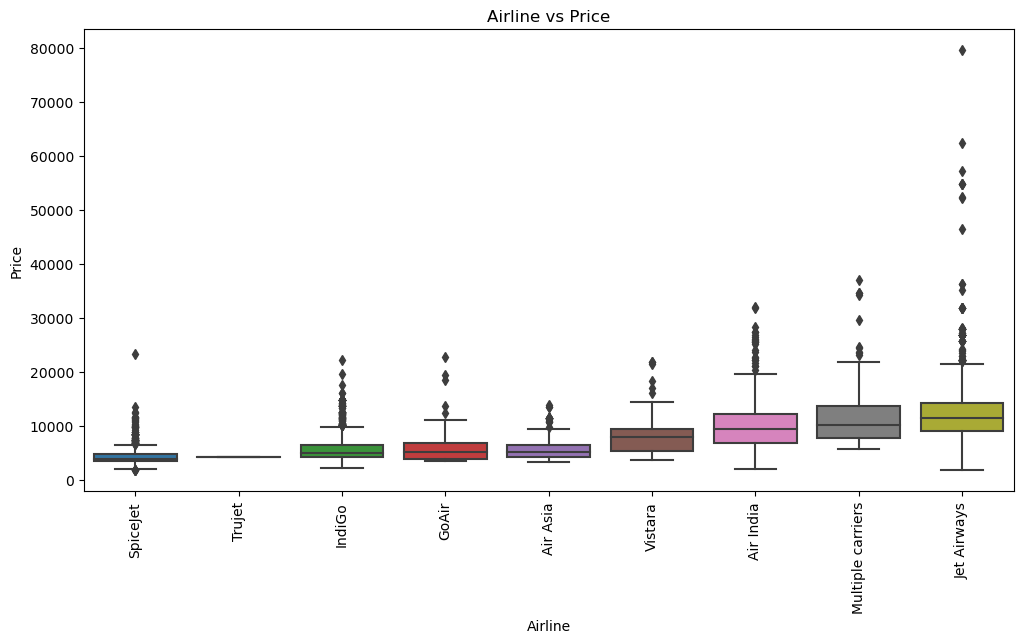

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merging specified categories in the 'Airline' feature
df_train['Airline'] = df_train['Airline'].replace({
    'Vistara Premium economy': 'Vistara',
    'Jet Airways Business': 'Jet Airways',
    'Multiple carriers Premium economy': 'Multiple carriers',
    
})
df_test['Airline'] = df_test['Airline'].replace({
    'Vistara Premium economy': 'Vistara',
    'Jet Airways Business': 'Jet Airways',
    'Multiple carriers Premium economy': 'Multiple carriers',
    
})

# Re-plotting the updated Airline feature distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='Airline', order=df_train['Airline'].value_counts().index)
plt.title('Count of Flights by Airline')
plt.xticks(rotation=90)
plt.show()

# Re-plotting the updated Airline feature dependence on Price
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, x='Airline', y='Price', order=df_train.groupby('Airline')['Price'].median().sort_values().index)
plt.title('Airline vs Price')
plt.xticks(rotation=90)
plt.show()


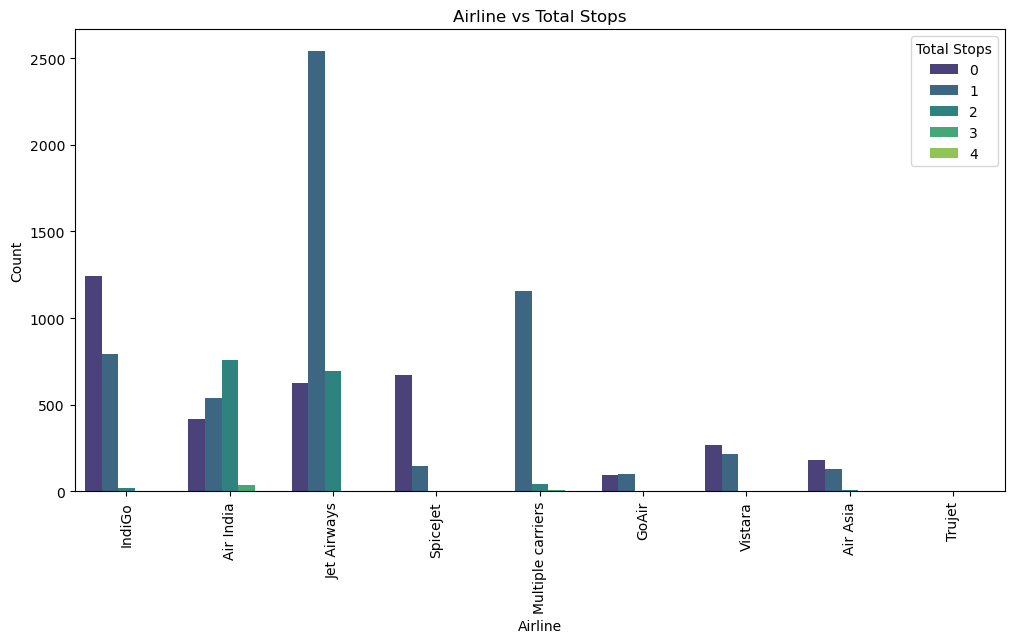

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='Airline', hue='Total_Stops', palette='viridis')
plt.title('Airline vs Total Stops')
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.legend(title='Total Stops')
plt.show()


#### Here we can observe that Indigo has maximum number of direct flights, Jet Airways has maximum number of connecting flights with 1 or more stops.

In [38]:
## We will perform Frequency Encoding on the Airline feature

## Source

In [39]:
df_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [40]:
df_test['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

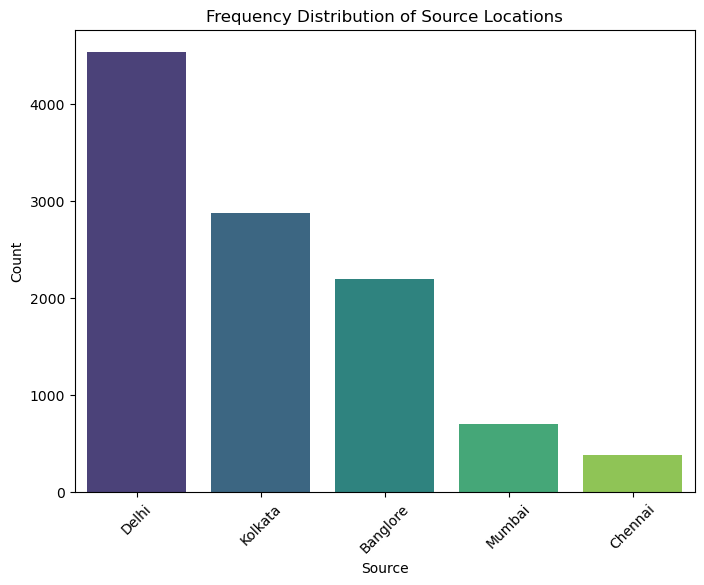

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Source', order=df_train['Source'].value_counts().index, palette='viridis')
plt.title('Frequency Distribution of Source Locations')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


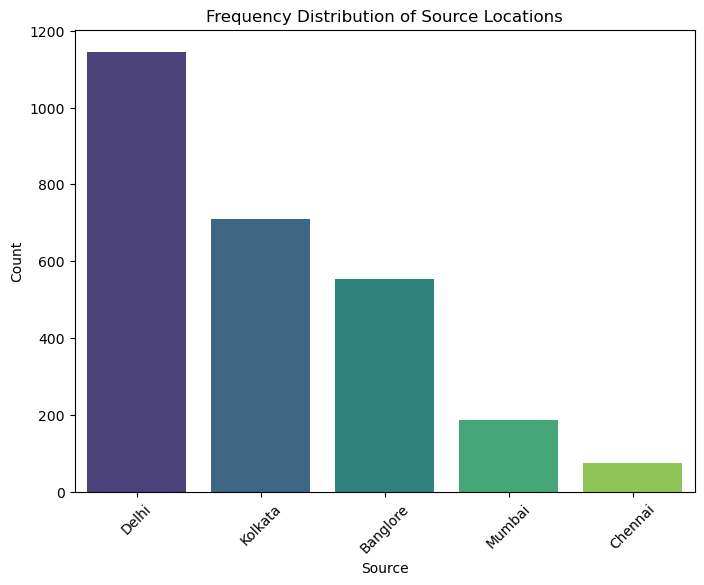

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_test, x='Source', order=df_test['Source'].value_counts().index, palette='viridis')
plt.title('Frequency Distribution of Source Locations')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### The highest number of flights flying have their source as Delhi

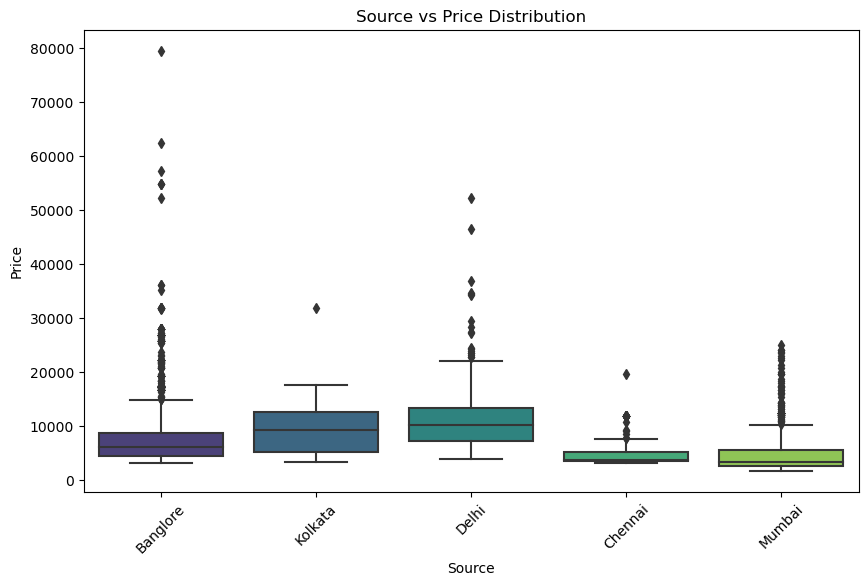

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x='Source', y='Price', palette='viridis')
plt.title('Source vs Price Distribution')
plt.xlabel('Source')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


#### Bangalore has the most varying price range

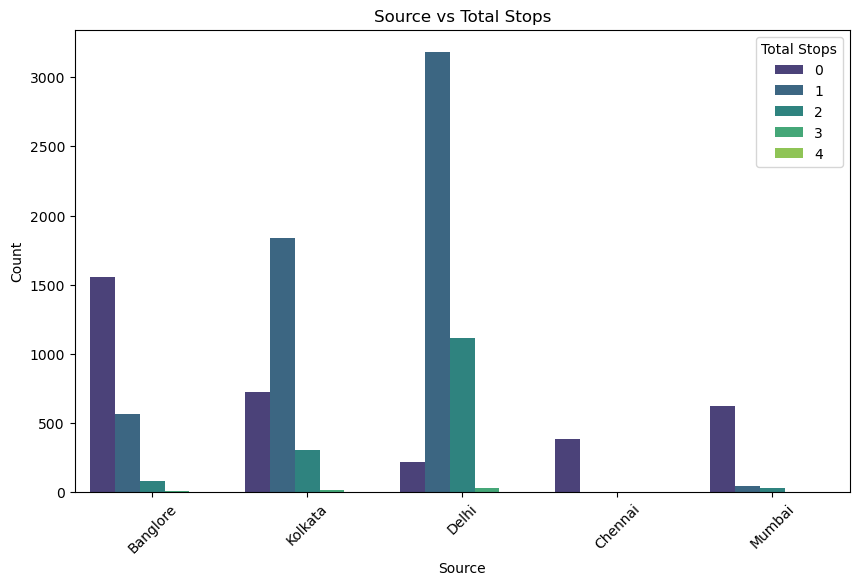

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='Source', hue='Total_Stops', palette='viridis')
plt.title('Source vs Total Stops')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Total Stops')
plt.show()


#### Bangalore has the highest number of non stop flights whereas most flights with one stop has Delhi as their source 

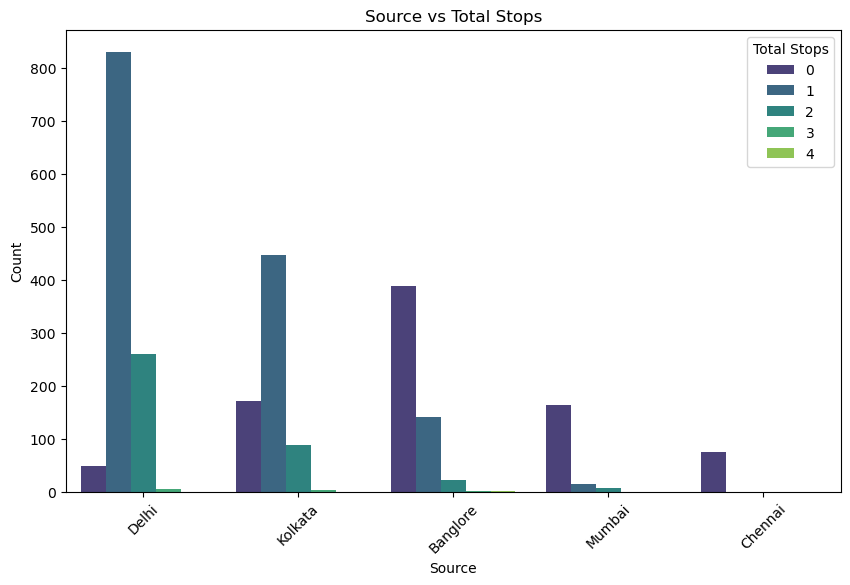

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_test, x='Source', hue='Total_Stops', palette='viridis')
plt.title('Source vs Total Stops')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Total Stops')
plt.show()


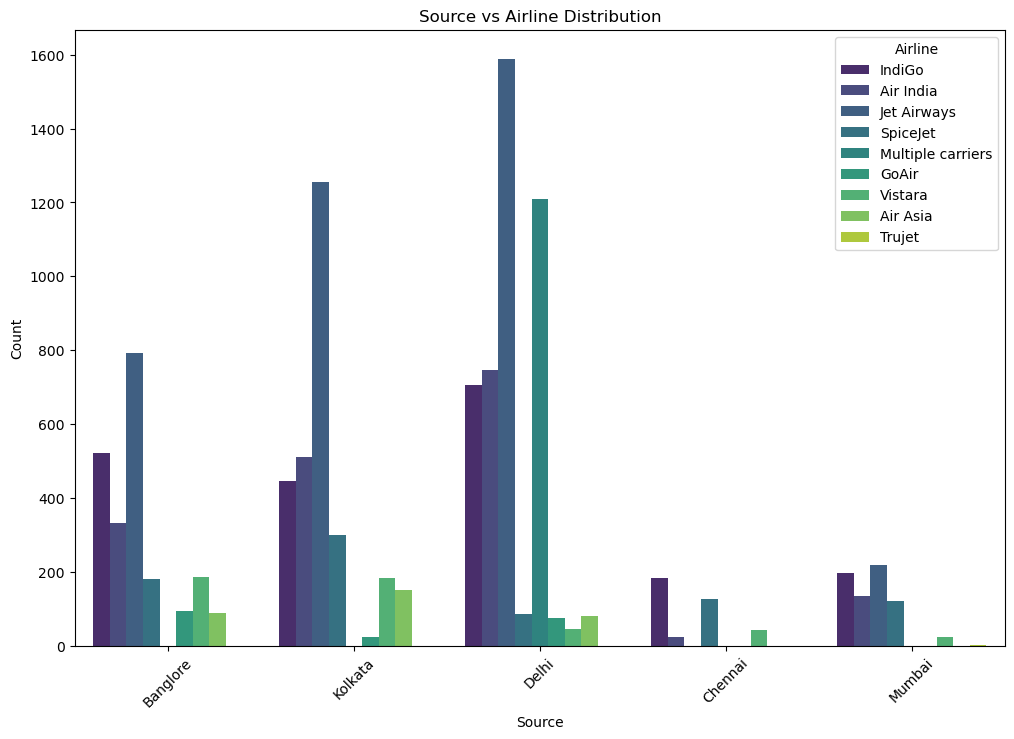

In [46]:
# Count plot showing Source and Airline
plt.figure(figsize=(12, 8))
sns.countplot(data=df_train, x='Source', hue='Airline', palette='viridis')
plt.title('Source vs Airline Distribution')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Airline')
plt.show()


#### Jet airways has the maximum number of flights flying from Delhi
#### Also it seems only Delhi has the option of flying from multiple airlines

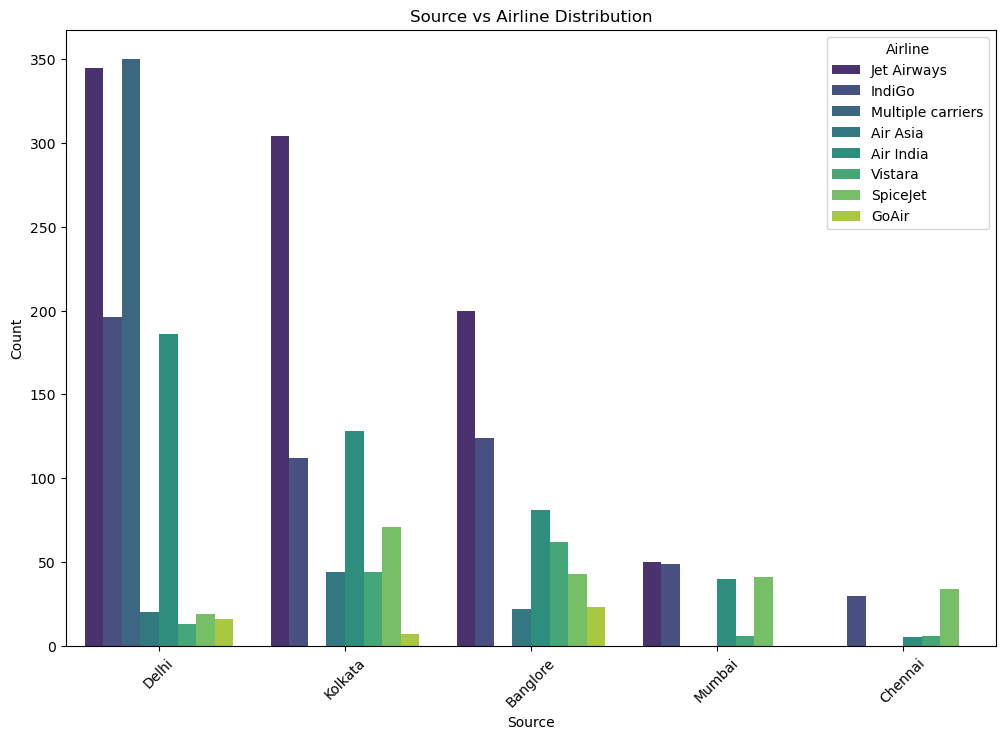

In [47]:
# Count plot showing Source and Airline
plt.figure(figsize=(12, 8))
sns.countplot(data=df_test, x='Source', hue='Airline', palette='viridis')
plt.title('Source vs Airline Distribution')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Airline')
plt.show()


In [48]:
### We will perform one hot encoding on the source feature

## Destination

In [49]:
df_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [50]:
df_test['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

### Replacing duplicate values in the Destination feature

In [51]:
df_train['Destination'].replace('New Delhi', 'Delhi', inplace=True)
df_test['Destination'].replace('New Delhi', 'Delhi', inplace=True)


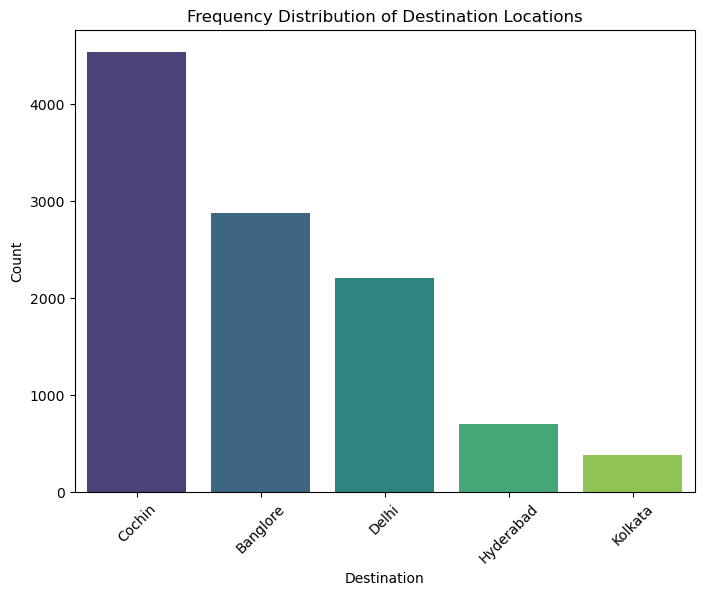

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Destination', order=df_train['Destination'].value_counts().index, palette='viridis')
plt.title('Frequency Distribution of Destination Locations')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


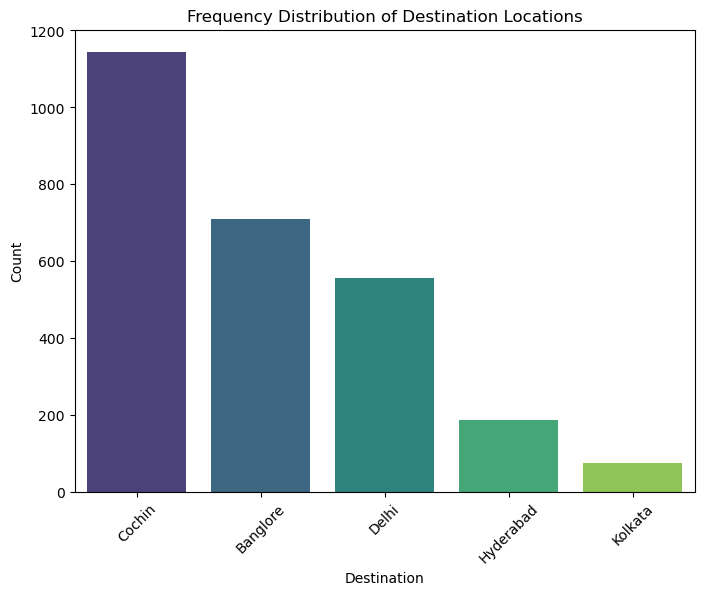

In [53]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_test, x='Destination', order=df_test['Destination'].value_counts().index, palette='viridis')
plt.title('Frequency Distribution of Destination Locations')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Cochin has the highest number of flights as their destination whereas Kolkata having the least

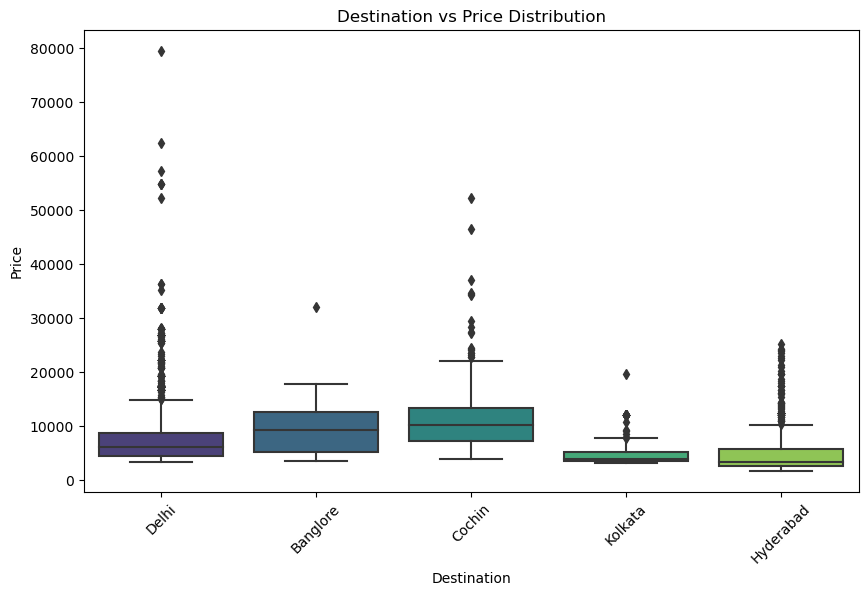

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x='Destination', y='Price', palette='viridis')
plt.title('Destination vs Price Distribution')
plt.xlabel('Destination')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


#### Delhi has the most number of varying prices

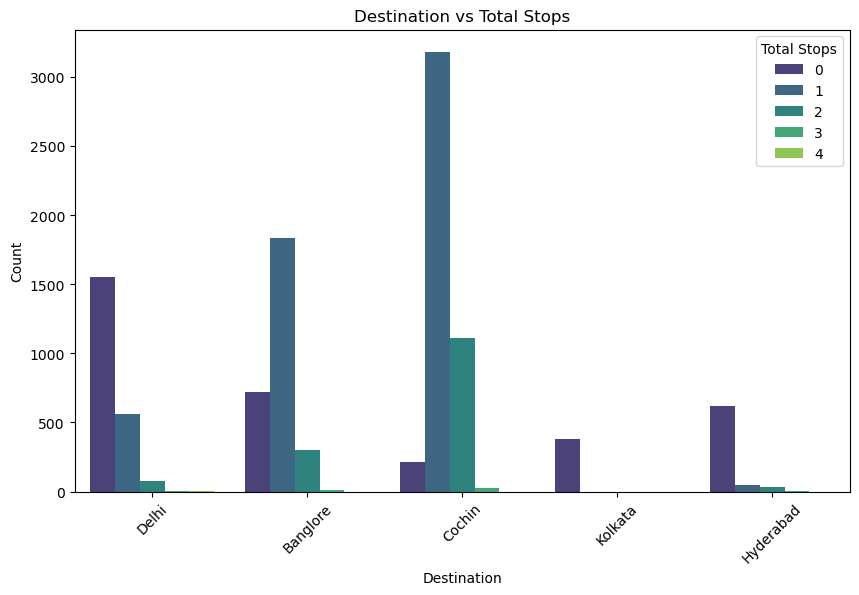

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='Destination', hue='Total_Stops', palette='viridis')
plt.title('Destination vs Total Stops')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Total Stops')
plt.show()


#### The highest number of non stop flights have Delhi as their destination whereas in Cochin, most flights which land have at least one stop.

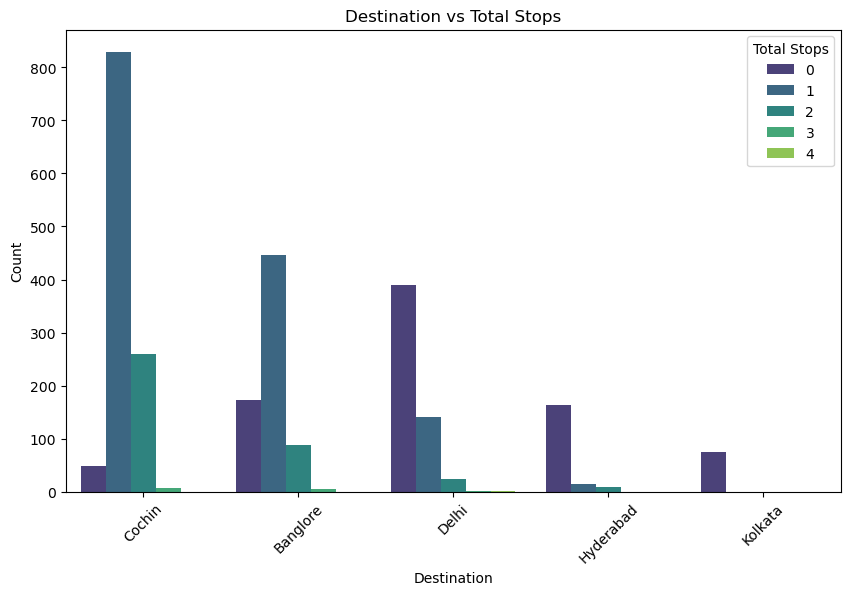

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_test, x='Destination', hue='Total_Stops', palette='viridis')
plt.title('Destination vs Total Stops')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Total Stops')
plt.show()


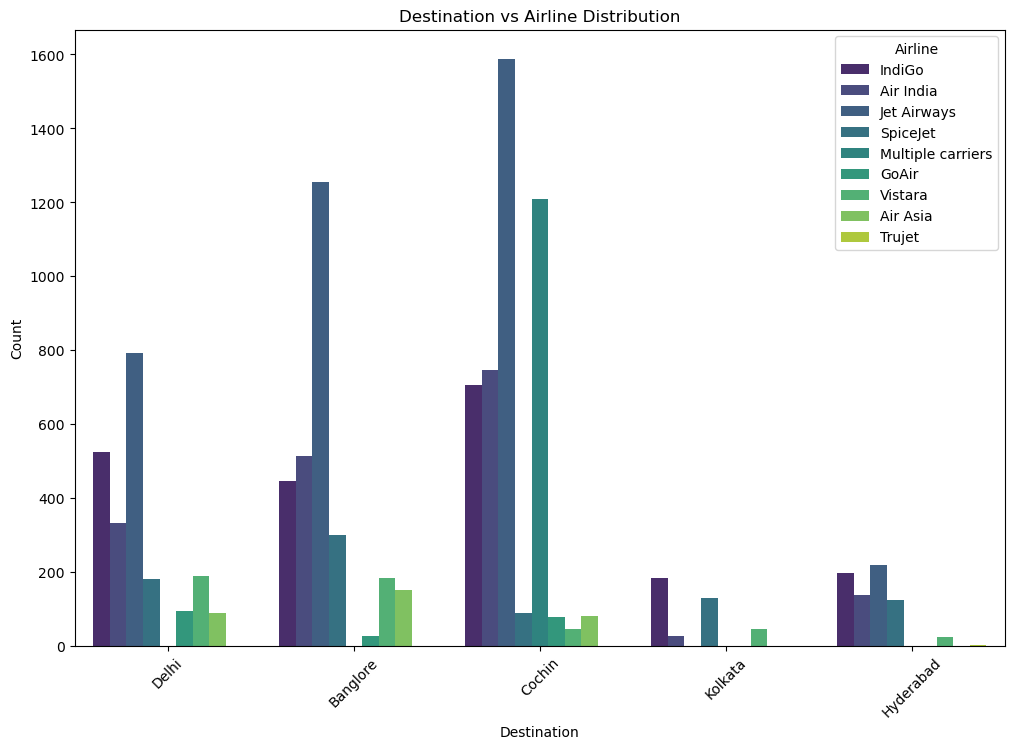

In [57]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_train, x='Destination', hue='Airline', palette='viridis')
plt.title('Destination vs Airline Distribution')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Airline')
plt.show()


#### Jet Airways has the maximum number of flights with their destination as Cochin
#### Also flights flying with multiple airlines have their destination as Cochin

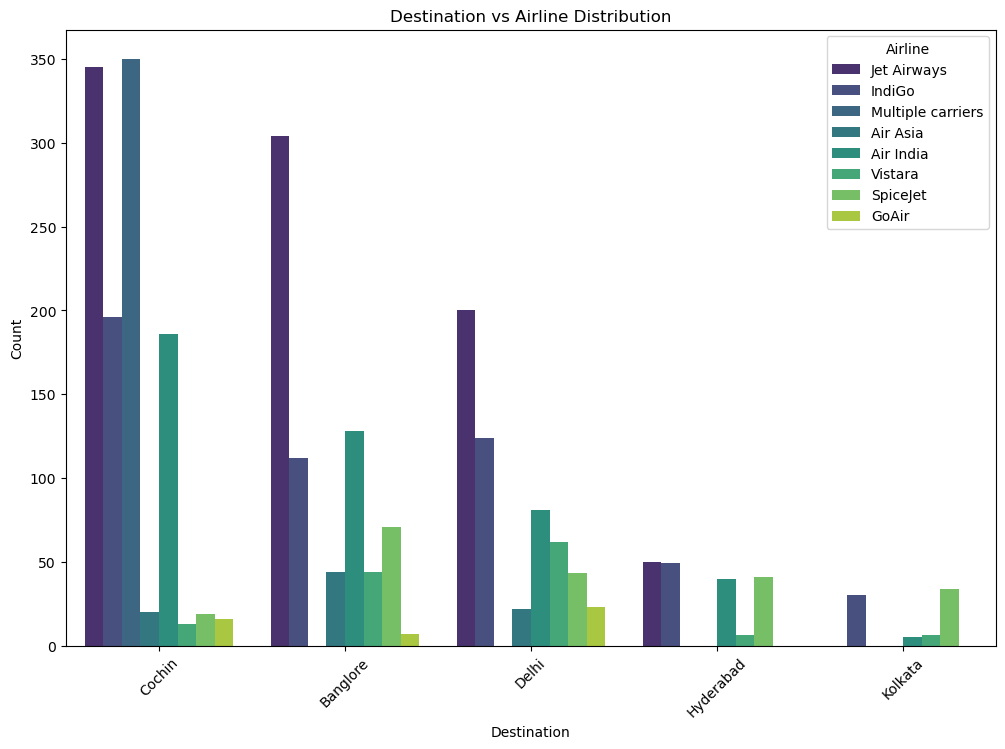

In [58]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_test, x='Destination', hue='Airline', palette='viridis')
plt.title('Destination vs Airline Distribution')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Airline')
plt.show()


## Route

In [59]:
df_train['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

#### There are 128 categories in the route feature in the training data

In [60]:
df_test['Route'].value_counts()

DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                              ... 
BLR → BOM → IDR → GWL → DEL      1
BLR → GOI → DEL                  1
CCU → PAT → BLR                  1
BLR → VGA → DEL                  1
BOM → GOI → PNQ → HYD            1
Name: Route, Length: 100, dtype: int64

#### There are 100 categories in the route feature in the testing data

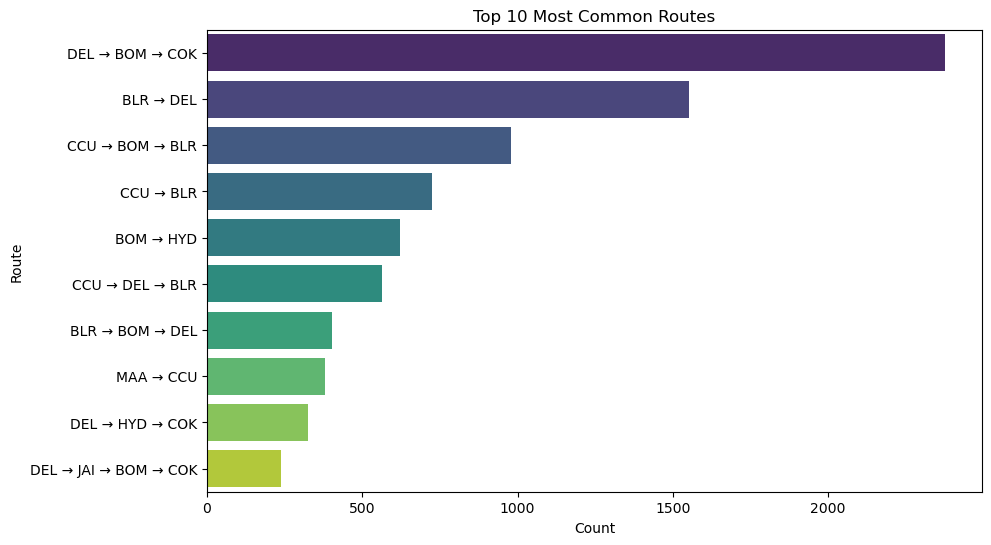

In [61]:
plt.figure(figsize=(10, 6))
route_counts = df_train['Route'].value_counts().head(10)  # Display top 10 routes
sns.barplot(y=route_counts.index, x=route_counts.values, palette='viridis')
plt.title('Top 10 Most Common Routes')
plt.xlabel('Count')
plt.ylabel('Route')
plt.show()


#### Most common flight route starts from Delhi and lands in Cochin with one stop in Mumbai

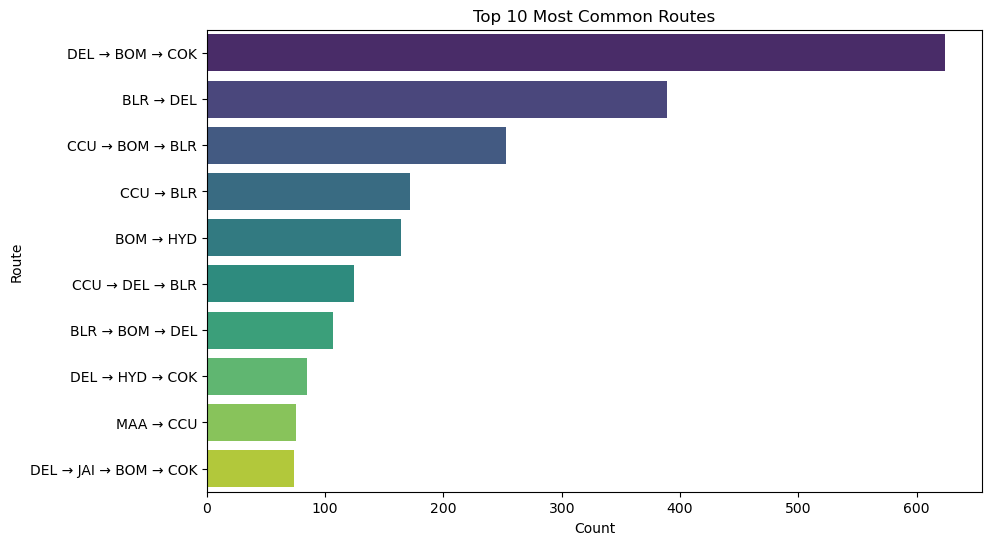

In [62]:
plt.figure(figsize=(10, 6))
route_counts = df_test['Route'].value_counts().head(10)  # Display top 10 routes
sns.barplot(y=route_counts.index, x=route_counts.values, palette='viridis')
plt.title('Top 10 Most Common Routes')
plt.xlabel('Count')
plt.ylabel('Route')
plt.show()


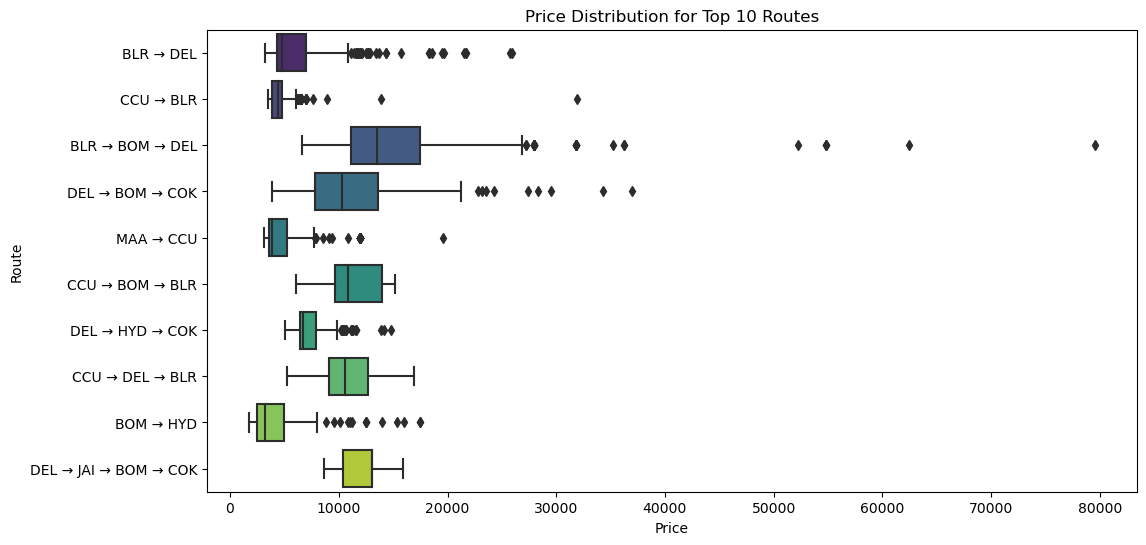

In [63]:
# For better visualization, consider focusing on the top 10 routes
top_routes = df_train['Route'].value_counts().head(10).index
df_top_routes = df_train[df_train['Route'].isin(top_routes)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_routes, y='Route', x='Price', palette='viridis')
plt.title('Price Distribution for Top 10 Routes')
plt.xlabel('Price')
plt.ylabel('Route')
plt.show()


#### Here we can see that certain routes are priced higher than the others, also for some routes the price range varies quite a lot

### Performing feature engineering on the Route feature by creating a new feature Route_Popularity

In [64]:
route_popularity = df_train['Route'].value_counts().to_dict()
df_train['Route_Popularity'] = df_train['Route'].map(route_popularity)


route_popularity = df_test['Route'].value_counts().to_dict()
df_test['Route_Popularity'] = df_test['Route'].map(route_popularity)



In [65]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Route_Popularity
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,1552
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,6
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,41
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,9
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107,724
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145,724
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229,1552
10681,Vistara,01/03/2019,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648,1552


In [66]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Route_Popularity
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,624
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,13
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,624
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,624
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,389
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1,No info,124
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,0,No info,172
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1,No info,624
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1,No info,624


In [67]:
# Count occurrences of each route (Route Popularity)
df_train['Route_Popularity'] = df_train.groupby('Route')['Route'].transform('count')


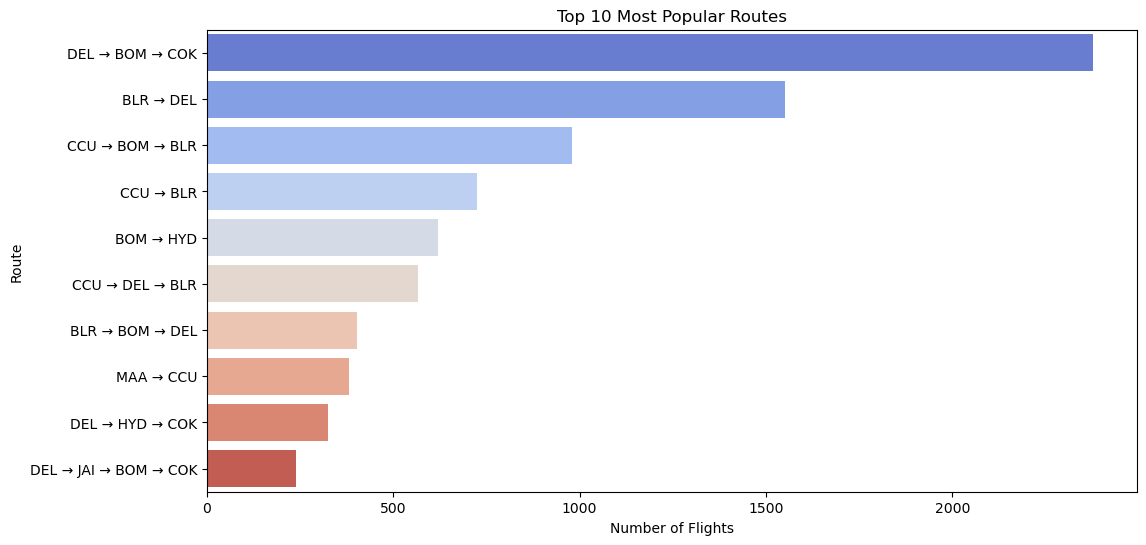

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Get the top 10 most popular routes
top_routes = df_train['Route'].value_counts().nlargest(10)

sns.barplot(x=top_routes.values, y=top_routes.index, palette="coolwarm")

plt.title('Top 10 Most Popular Routes')
plt.xlabel('Number of Flights')
plt.ylabel('Route')
plt.show()


## Additional_Info

In [69]:
df_train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

#### It has 10 categories in the training data, where 'No info' is repeated

In [70]:
df_test['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

#### The test data has 6 categories

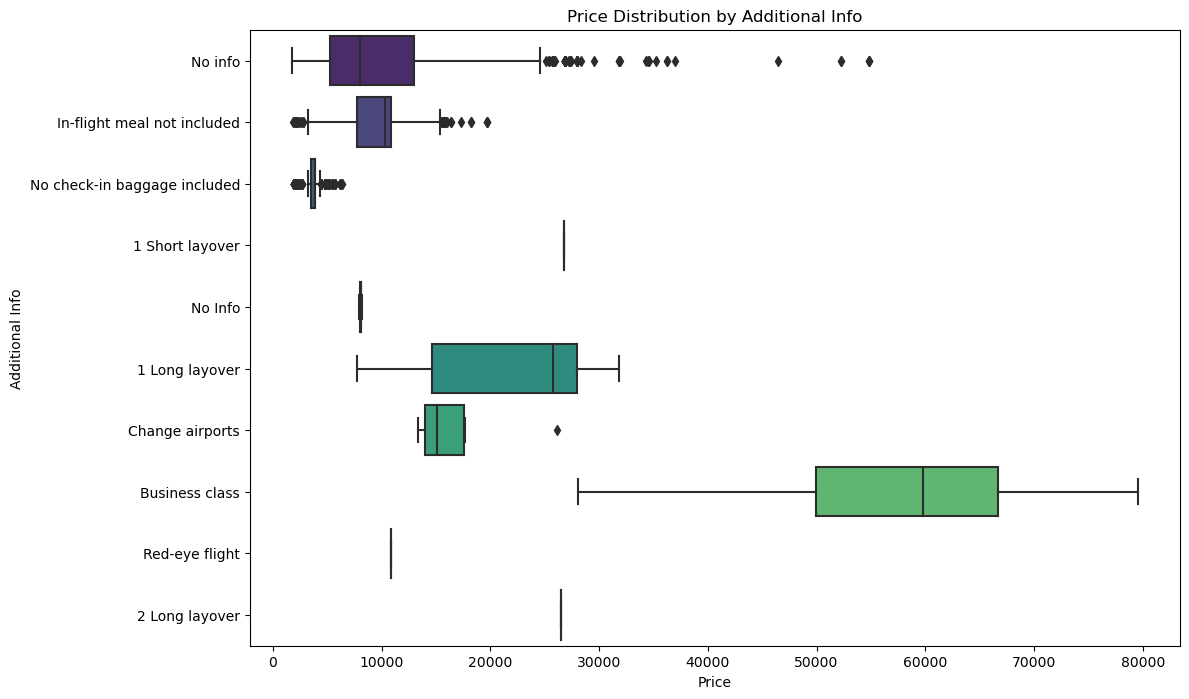

In [71]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_train, y='Additional_Info', x='Price', palette='viridis')
plt.title('Price Distribution by Additional Info')
plt.xlabel('Price')
plt.ylabel('Additional Info')
plt.show()


#### Flight prices definitely depend on additional_info such as Bussiness class flights tend to be a lot costlier whereas flights with no check_in baggage or red-eye flights tend to be cheaper

In [72]:
# Calculate the frequency of each category
additional_info_counts = df_train['Additional_Info'].value_counts()

# Define a threshold to identify rare categories
threshold = 100  # You can adjust this threshold based on the dataset

# Identify rare categories
rare_categories = additional_info_counts[additional_info_counts < threshold].index.tolist()

# Print the rare categories
rare_categories

['1 Long layover',
 'Change airports',
 'Business class',
 'No Info',
 '1 Short layover',
 'Red-eye flight',
 '2 Long layover']

In [73]:
# Merge rare categories into 'Other'
df_train['Additional_Info'] = df_train['Additional_Info'].apply(lambda x: 'Other' if x in rare_categories else x)
df_test['Additional_Info'] = df_test['Additional_Info'].apply(lambda x: 'Other' if x in rare_categories else x)

# Verifying the changes
df_train['Additional_Info'].value_counts()


No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
Other                             36
Name: Additional_Info, dtype: int64

In [74]:
df_train.sample(10)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Route_Popularity
1370,IndiGo,27/03/2019,Delhi,Cochin,DEL → HYD → COK,16:10,22:20,6h 10m,1,No info,6412,326
996,Jet Airways,21/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,04:40 22 May,8h 40m,1,In-flight meal not included,10844,979
10478,Air India,21/03/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 22 Mar,23h 40m,1,No info,7532,146
6172,Multiple carriers,27/03/2019,Delhi,Cochin,DEL → BOM → COK,10:20,18:50,8h 30m,1,No info,11421,2376
5042,Air India,1/05/2019,Kolkata,Banglore,CCU → DEL → COK → BLR,10:00,13:45 02 May,27h 45m,2,No info,15164,36
9695,Jet Airways,6/04/2019,Delhi,Cochin,DEL → BOM → COK,22:50,12:35 07 Apr,13h 45m,1,In-flight meal not included,5177,2376
2177,IndiGo,15/04/2019,Delhi,Cochin,DEL → COK,14:25,17:40,3h 15m,0,No info,6015,213
9602,Air India,27/05/2019,Delhi,Cochin,DEL → BOM → COK,18:00,19:15 28 May,25h 15m,1,No info,8372,2376
1790,IndiGo,12/06/2019,Mumbai,Hyderabad,BOM → HYD,01:40,03:10,1h 30m,0,No info,2754,621
3860,Air Asia,9/06/2019,Kolkata,Banglore,CCU → DEL → BLR,07:35,19:25,11h 50m,1,No info,7870,565


In [75]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Route_Popularity
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,624
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,13
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,624
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,624
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,389
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1,No info,124
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,0,No info,172
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1,No info,624
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1,No info,624


In [76]:
## We will perform target guided encoding for 'Additional_Info'

## Date_Of_Journey

#### Converting datatype of Date_of_Journey to datetime format

In [77]:
# Convert to datetime format
df_train['Date_of_Journey'] = pd.to_datetime(df_train['Date_of_Journey'], format='%d/%m/%Y', errors='coerce')

# Check for nulls in case of incorrect date formats
print(df_train['Date_of_Journey'].isnull().sum())




# Convert to datetime format
df_test['Date_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey'], format='%d/%m/%Y', errors='coerce')

# Check for nulls in case of incorrect date formats
print(df_test['Date_of_Journey'].isnull().sum())

0
0


In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           10682 non-null  object        
 1   Date_of_Journey   10682 non-null  datetime64[ns]
 2   Source            10682 non-null  object        
 3   Destination       10682 non-null  object        
 4   Route             10682 non-null  object        
 5   Dep_Time          10682 non-null  object        
 6   Arrival_Time      10682 non-null  object        
 7   Duration          10682 non-null  object        
 8   Total_Stops       10682 non-null  int32         
 9   Additional_Info   10682 non-null  object        
 10  Price             10682 non-null  int64         
 11  Route_Popularity  10682 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(8)
memory usage: 1.0+ MB


In [79]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           2671 non-null   object        
 1   Date_of_Journey   2671 non-null   datetime64[ns]
 2   Source            2671 non-null   object        
 3   Destination       2671 non-null   object        
 4   Route             2671 non-null   object        
 5   Dep_Time          2671 non-null   object        
 6   Arrival_Time      2671 non-null   object        
 7   Duration          2671 non-null   object        
 8   Total_Stops       2671 non-null   int32         
 9   Additional_Info   2671 non-null   object        
 10  Route_Popularity  2671 non-null   int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(8)
memory usage: 219.2+ KB


### Creating new features 'Journey_Day' and 'Journey_Month' from 'Date_of_Journey' feature

In [80]:
# Extract day, month
df_train['Journey_Day'] = df_train['Date_of_Journey'].dt.day
df_train['Journey_Month'] = df_train['Date_of_Journey'].dt.month



# Extract day, month
df_test['Journey_Day'] = df_test['Date_of_Journey'].dt.day
df_test['Journey_Month'] = df_test['Date_of_Journey'].dt.month

In [81]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Route_Popularity,Journey_Day,Journey_Month
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,1552,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,6,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,41,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,9,12,5
4,IndiGo,2019-03-01,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107,724,9,4
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145,724,27,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229,1552,27,4
10681,Vistara,2019-03-01,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648,1552,1,3


In [82]:
df_test


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Route_Popularity,Journey_Day,Journey_Month
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,624,6,6
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,13,12,5
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,624,21,5
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,624,21,5
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,389,24,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1,No info,124,6,6
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,0,No info,172,27,3
2668,Jet Airways,2019-03-06,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1,No info,624,6,3
2669,Air India,2019-03-06,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1,No info,624,6,3


In [83]:
print(df_train['Journey_Day'].value_counts())
print(df_test['Journey_Day'].value_counts())

9     1406
6     1287
27    1130
21    1111
1     1075
24    1052
15     984
12     957
3      848
18     832
Name: Journey_Day, dtype: int64
9     363
6     339
1     274
15    267
12    257
21    257
24    255
3     235
27    220
18    204
Name: Journey_Day, dtype: int64


In [84]:
print(df_train['Journey_Month'].value_counts())
print(df_test['Journey_Month'].value_counts())

5    3465
6    3414
3    2724
4    1079
Name: Journey_Month, dtype: int64
6    872
5    863
3    688
4    248
Name: Journey_Month, dtype: int64


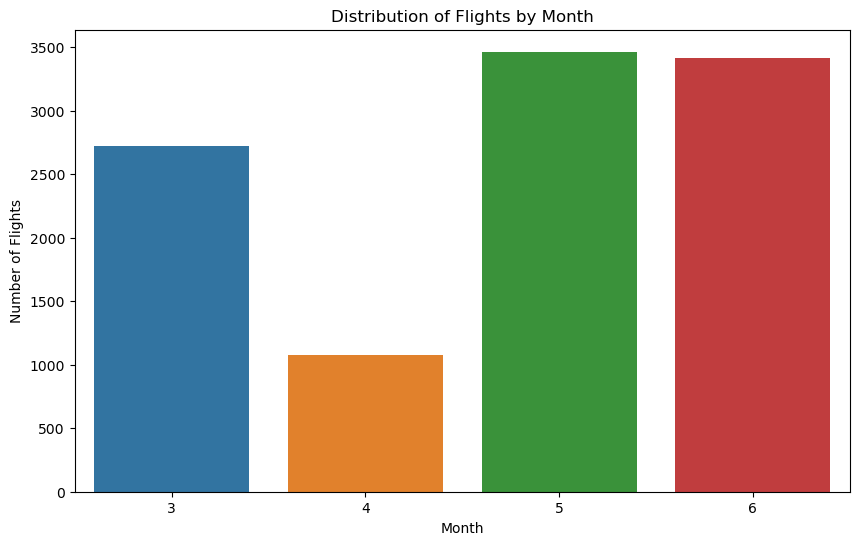

In [85]:
# Monthly distribution of flights
plt.figure(figsize=(10, 6))
sns.countplot(x='Journey_Month', data=df_train)
plt.title('Distribution of Flights by Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.show()


#### Number of flights flying out depends on months where in certain months the frequency of flights are more such as May and June.

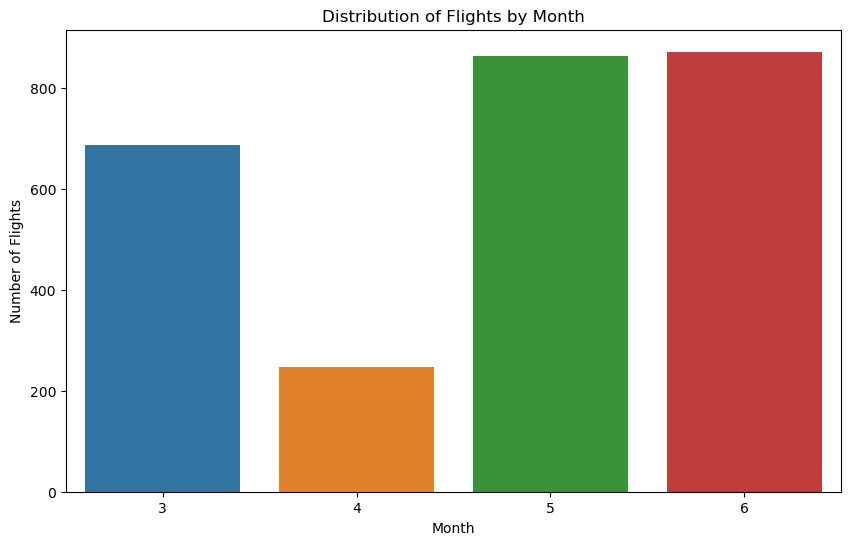

In [86]:
# Monthly distribution of flights
plt.figure(figsize=(10, 6))
sns.countplot(x='Journey_Month', data=df_test)
plt.title('Distribution of Flights by Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.show()


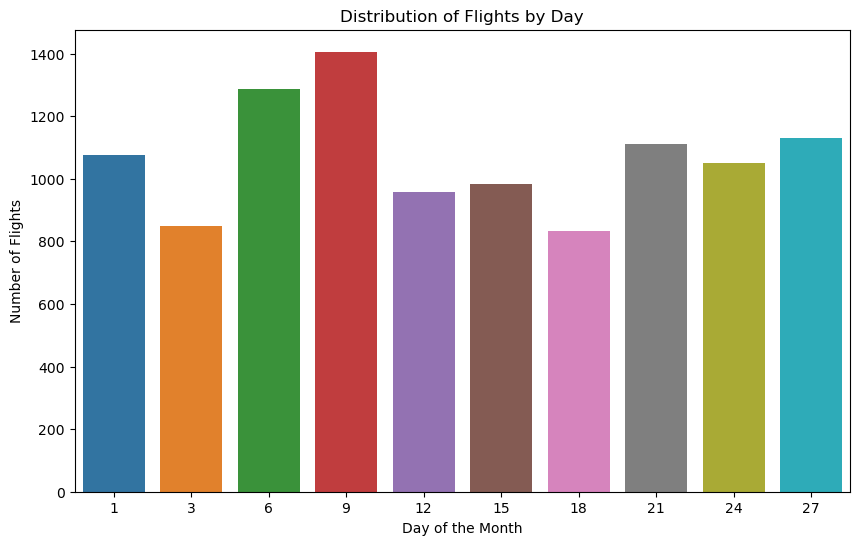

In [87]:
# Daily distribution of flights
plt.figure(figsize=(10, 6))
sns.countplot(x='Journey_Day', data=df_train)
plt.title('Distribution of Flights by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Flights')
plt.show()


#### Frequency of flights tend to be higher for certain days as well

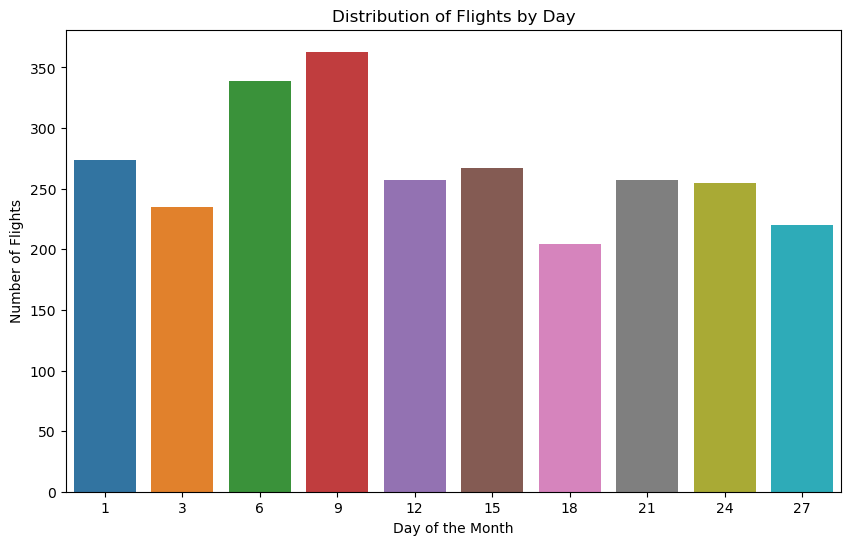

In [88]:
# Daily distribution of flights
plt.figure(figsize=(10, 6))
sns.countplot(x='Journey_Day', data=df_test)
plt.title('Distribution of Flights by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Flights')
plt.show()


### Creating new feature 'Journey_Weekday' from 'Date_of_Journey' from Monday=0 and Sunday=6

In [89]:
# Extract day of the week
df_train['Journey_Weekday'] = df_train['Date_of_Journey'].dt.dayofweek  # Monday=0, Sunday=6


# Extract day of the week
df_test['Journey_Weekday'] = df_test['Date_of_Journey'].dt.dayofweek  # Monday=0, Sunday=6

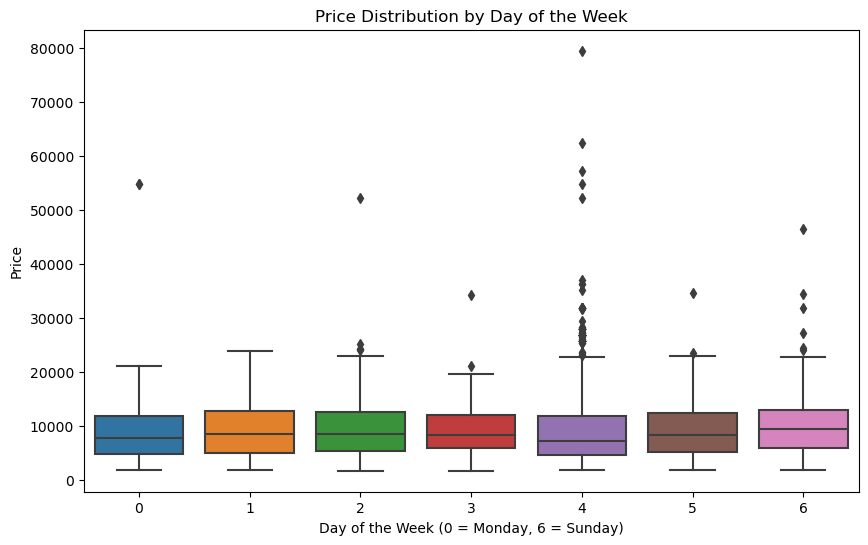

In [90]:
# Setting the plot size
plt.figure(figsize=(10, 6))

# Create a boxplot to show the distribution of Price by Journey_Weekday
sns.boxplot(x='Journey_Weekday', y='Price', data=df_train)

# Adding title and labels
plt.title('Price Distribution by Day of the Week')
plt.xlabel('Day of the Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Price')

# Display the plot
plt.show()


#### The box plot clearly shows that on fridays flight prices can rise quite a bit.

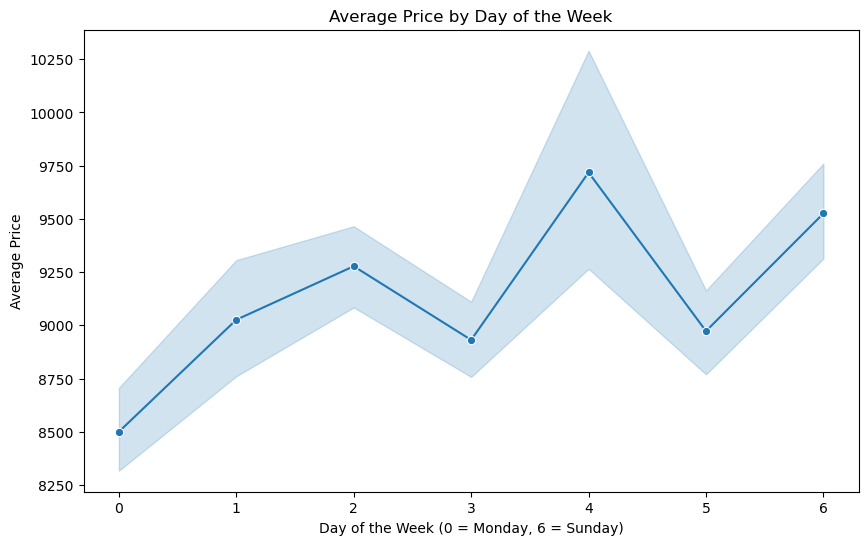

In [91]:
# Setting the plot size
plt.figure(figsize=(10, 6))

# Create a lineplot to show the average Price by Journey_Weekday
sns.lineplot(x='Journey_Weekday', y='Price', data=df_train, estimator='mean', marker='o')

# Adding title and labels
plt.title('Average Price by Day of the Week')
plt.xlabel('Day of the Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Average Price')

# Display the plot
plt.show()


#### The average flight prices are also high for Fridays and Sundays.

### Creating a new feature 'Is_Weekend' from 'Journey_Weekday' feature indicating whether the flight was flying on weekends or not

In [92]:
# Weekend flag (1 for weekend, 0 for weekday)
df_train['Is_Weekend'] = df_train['Journey_Weekday'].apply(lambda x: 1 if x >= 5 else 0)


# Weekend flag (1 for weekend, 0 for weekday)
df_test['Is_Weekend'] = df_test['Journey_Weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [93]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Route_Popularity,Journey_Day,Journey_Month,Journey_Weekday,Is_Weekend
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,1552,24,3,6,1
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,6,1,5,2,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,41,9,6,6,1
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,9,12,5,6,1
4,IndiGo,2019-03-01,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,3,1,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107,724,9,4,1,0
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145,724,27,4,5,1
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229,1552,27,4,5,1
10681,Vistara,2019-03-01,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648,1552,1,3,4,0


In [94]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Route_Popularity,Journey_Day,Journey_Month,Journey_Weekday,Is_Weekend
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,624,6,6,3,0
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,13,12,5,6,1
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,624,21,5,1,0
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,624,21,5,1,0
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,389,24,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1,No info,124,6,6,3,0
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,0,No info,172,27,3,2,0
2668,Jet Airways,2019-03-06,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1,No info,624,6,3,2,0
2669,Air India,2019-03-06,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1,No info,624,6,3,2,0


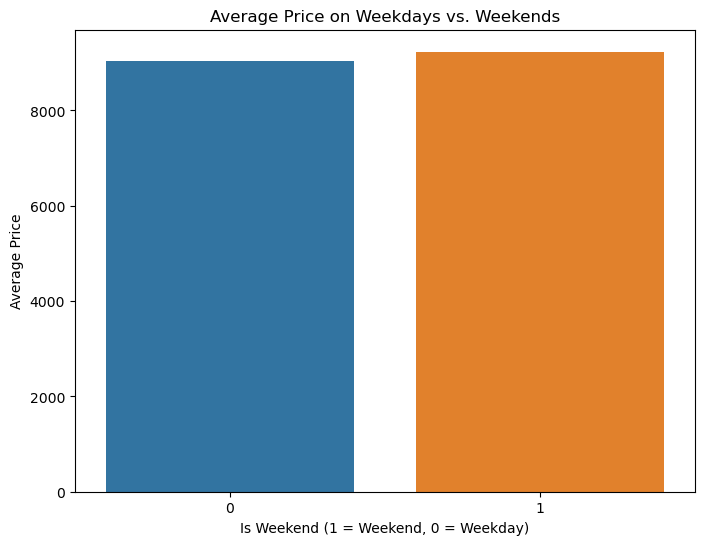

In [95]:
# Setting the plot size
plt.figure(figsize=(8, 6))

# Create a barplot to show the average Price by Is_Weekend
sns.barplot(x='Is_Weekend', y='Price', data=df_train, estimator='mean', ci=None)

# Adding title and labels
plt.title('Average Price on Weekdays vs. Weekends')
plt.xlabel('Is Weekend (1 = Weekend, 0 = Weekday)')
plt.ylabel('Average Price')

# Display the plot
plt.show()


#### Average price for flights are higher on weekends, but we have seen that on Fridays airlines offer a wide range of prices

## Dep_Time and Arrival_Time

### Converting these into date time format and then creating Dep_Hour, Dep_Minute and Arrival_Hour, Arrival_Minute features.

In [96]:
df_train['Dep_Hour'] = pd.to_datetime(df_train['Dep_Time']).dt.hour
df_train['Dep_Minute'] = pd.to_datetime(df_train['Dep_Time']).dt.minute
df_train['Arrival_Hour'] = pd.to_datetime(df_train['Arrival_Time']).dt.hour
df_train['Arrival_Minute'] = pd.to_datetime(df_train['Arrival_Time']).dt.minute

In [97]:
df_test['Dep_Hour'] = pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_Minute'] = pd.to_datetime(df_test['Dep_Time']).dt.minute
df_test['Arrival_Hour'] = pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_Minute'] = pd.to_datetime(df_test['Arrival_Time']).dt.minute

In [98]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Route_Popularity,Journey_Day,Journey_Month,Journey_Weekday,Is_Weekend,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,1552,24,3,6,1,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,6,1,5,2,0,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,41,9,6,6,1,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,9,12,5,6,1,18,5,23,30
4,IndiGo,2019-03-01,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,3,1,3,4,0,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107,724,9,4,1,0,19,55,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145,724,27,4,5,1,20,45,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229,1552,27,4,5,1,8,20,11,20
10681,Vistara,2019-03-01,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648,1552,1,3,4,0,11,30,14,10


In [99]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Route_Popularity,Journey_Day,Journey_Month,Journey_Weekday,Is_Weekend,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,624,6,6,3,0,17,30,4,25
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,13,12,5,6,1,6,20,10,20
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,624,21,5,1,0,19,15,19,0
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,624,21,5,1,0,8,0,21,0
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,389,24,6,0,0,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1,No info,124,6,6,3,0,20,30,20,25
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,0,No info,172,27,3,2,0,14,20,16,55
2668,Jet Airways,2019-03-06,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1,No info,624,6,3,2,0,21,50,4,25
2669,Air India,2019-03-06,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1,No info,624,6,3,2,0,4,0,19,15


### Creating a new feature Departure part of the day - morning, afternoon, evening, night

In [100]:
def part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [101]:
# Departure Part of the Day
df_train['Dep_Part_of_Day'] = df_train['Dep_Hour'].apply(part_of_day)
df_test['Dep_Part_of_Day'] = df_test['Dep_Hour'].apply(part_of_day)


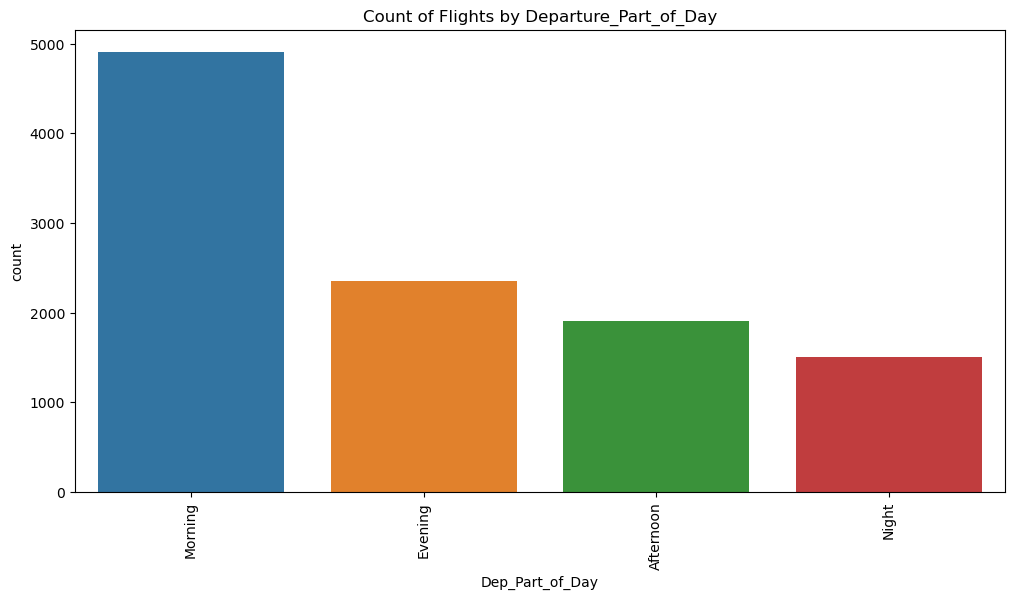

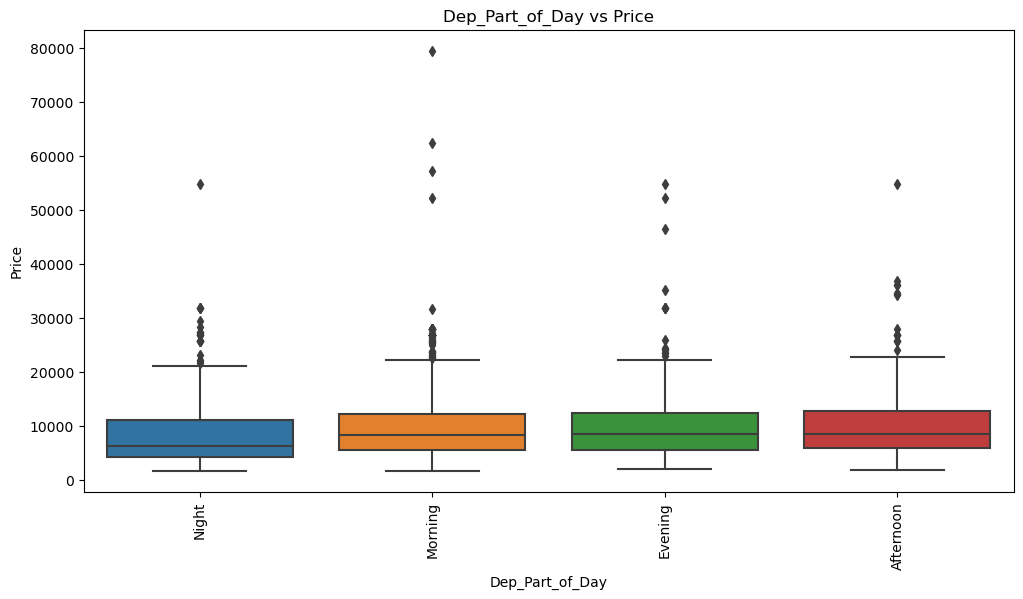

In [102]:
# Dep_Part_of_Day feature distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='Dep_Part_of_Day', order=df_train['Dep_Part_of_Day'].value_counts().index)
plt.title('Count of Flights by Departure_Part_of_Day')
plt.xticks(rotation=90)
plt.show()

# Dep_Part_of_Day feature dependence on Price
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, x='Dep_Part_of_Day', y='Price', order=df_train.groupby('Dep_Part_of_Day')['Price'].median().sort_values().index)
plt.title('Dep_Part_of_Day vs Price')
plt.xticks(rotation=90)
plt.show()


### Creating a new feature Arrival part of the day - morning, afternoon, evening, night

In [103]:
# Arrival Part of the Day
df_train['Arrival_Part_of_Day'] = df_train['Arrival_Hour'].apply(part_of_day)
df_test['Arrival_Part_of_Day'] = df_test['Arrival_Hour'].apply(part_of_day)


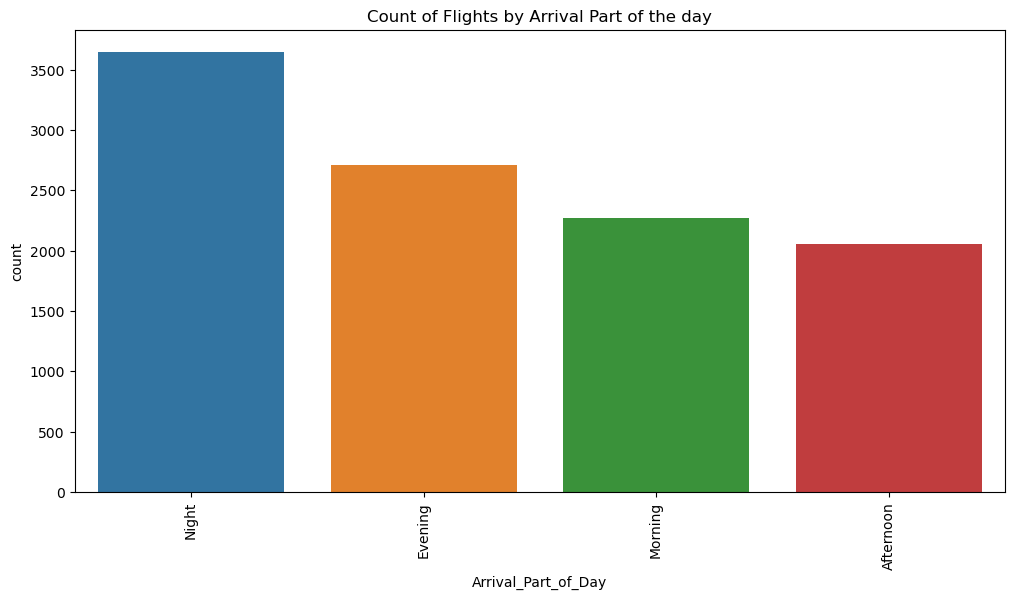

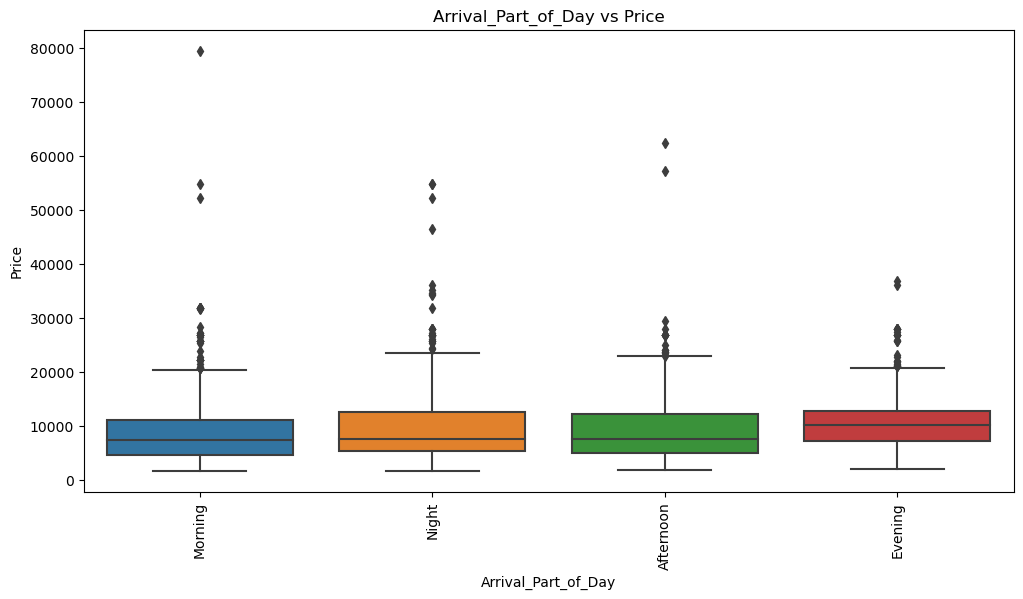

In [104]:
# Arrival_Part_of_Day feature distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='Arrival_Part_of_Day', order=df_train['Arrival_Part_of_Day'].value_counts().index)
plt.title('Count of Flights by Arrival Part of the day')
plt.xticks(rotation=90)
plt.show()

# Arrival_Part_of_Day feature dependence on Price
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, x='Arrival_Part_of_Day', y='Price', order=df_train.groupby('Arrival_Part_of_Day')['Price'].median().sort_values().index)
plt.title('Arrival_Part_of_Day vs Price')
plt.xticks(rotation=90)
plt.show()


## Duration

### Extracting hours and minutes from it

In [105]:
# Example to parse hours and minutes from 'Duration'
df_train['Duration_Hours'] = df_train['Duration'].str.extract(r'(\d+)h').fillna(0).astype(int)
df_train['Duration_Minutes'] = df_train['Duration'].str.extract(r'(\d+)m').fillna(0).astype(int)

# Example to parse hours and minutes from 'Duration'
df_test['Duration_Hours'] = df_test['Duration'].str.extract(r'(\d+)h').fillna(0).astype(int)
df_test['Duration_Minutes'] = df_test['Duration'].str.extract(r'(\d+)m').fillna(0).astype(int)



In [106]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_Weekday,Is_Weekend,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Dep_Part_of_Day,Arrival_Part_of_Day,Duration_Hours,Duration_Minutes
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,...,6,1,22,20,1,10,Night,Night,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,...,2,0,5,50,13,15,Morning,Afternoon,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,...,6,1,9,25,4,25,Morning,Night,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,...,6,1,18,5,23,30,Evening,Night,5,25
4,IndiGo,2019-03-01,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,...,4,0,16,50,21,35,Afternoon,Night,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,...,1,0,19,55,22,25,Evening,Night,2,30
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,...,5,1,20,45,23,20,Evening,Night,2,35
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,...,5,1,8,20,11,20,Morning,Morning,3,0
10681,Vistara,2019-03-01,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,...,4,0,11,30,14,10,Morning,Afternoon,2,40


In [107]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_Weekday,Is_Weekend,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Dep_Part_of_Day,Arrival_Part_of_Day,Duration_Hours,Duration_Minutes
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,...,3,0,17,30,4,25,Evening,Night,10,55
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,...,6,1,6,20,10,20,Morning,Morning,4,0
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,...,1,0,19,15,19,0,Evening,Evening,23,45
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,...,1,0,8,0,21,0,Morning,Night,13,0
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,...,0,0,23,55,2,45,Night,Night,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1,No info,...,3,0,20,30,20,25,Evening,Evening,23,55
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,0,No info,...,2,0,14,20,16,55,Afternoon,Afternoon,2,35
2668,Jet Airways,2019-03-06,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1,No info,...,2,0,21,50,4,25,Night,Night,6,35
2669,Air India,2019-03-06,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1,No info,...,2,0,4,0,19,15,Night,Evening,15,15


In [108]:
# Calculate total duration in minutes
df_train['Duration_Minutes'] = df_train['Duration_Hours'] * 60 + df_train['Duration_Minutes']

# Display the updated DataFrame
df_train.head()



# Calculate total duration in minutes
df_test['Duration_Minutes'] = df_test['Duration_Hours'] * 60 + df_test['Duration_Minutes']

# Display the updated DataFrame
df_test.head()



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_Weekday,Is_Weekend,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Dep_Part_of_Day,Arrival_Part_of_Day,Duration_Hours,Duration_Minutes
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,...,3,0,17,30,4,25,Evening,Night,10,655
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,...,6,1,6,20,10,20,Morning,Morning,4,240
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,...,1,0,19,15,19,0,Evening,Evening,23,1425
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,...,1,0,8,0,21,0,Morning,Night,13,780
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,...,0,0,23,55,2,45,Night,Night,2,170


## Target Variable : Price

### heatmap is a great way to visualize correlations between the target variable 'Price' and other numerical features

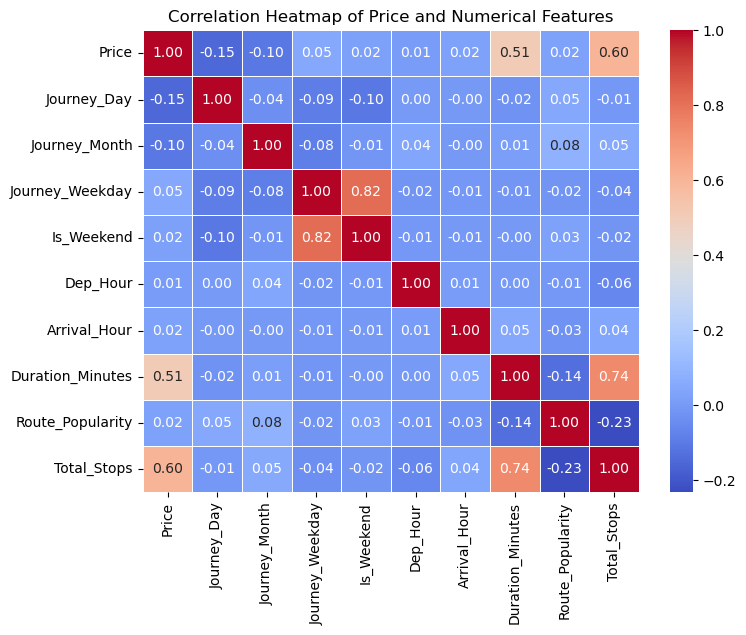

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features and target variable
numerical_features = ['Price','Journey_Day','Journey_Month','Journey_Weekday','Is_Weekend','Dep_Hour','Arrival_Hour','Duration_Minutes','Route_Popularity','Total_Stops']
correlation_matrix = df_train[numerical_features].corr()

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of Price and Numerical Features')

# Show the plot
plt.show()


In [110]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              10682 non-null  object        
 1   Date_of_Journey      10682 non-null  datetime64[ns]
 2   Source               10682 non-null  object        
 3   Destination          10682 non-null  object        
 4   Route                10682 non-null  object        
 5   Dep_Time             10682 non-null  object        
 6   Arrival_Time         10682 non-null  object        
 7   Duration             10682 non-null  object        
 8   Total_Stops          10682 non-null  int32         
 9   Additional_Info      10682 non-null  object        
 10  Price                10682 non-null  int64         
 11  Route_Popularity     10682 non-null  int64         
 12  Journey_Day          10682 non-null  int64         
 13  Journey_Month        10682 non-

In [111]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              2671 non-null   object        
 1   Date_of_Journey      2671 non-null   datetime64[ns]
 2   Source               2671 non-null   object        
 3   Destination          2671 non-null   object        
 4   Route                2671 non-null   object        
 5   Dep_Time             2671 non-null   object        
 6   Arrival_Time         2671 non-null   object        
 7   Duration             2671 non-null   object        
 8   Total_Stops          2671 non-null   int32         
 9   Additional_Info      2671 non-null   object        
 10  Route_Popularity     2671 non-null   int64         
 11  Journey_Day          2671 non-null   int64         
 12  Journey_Month        2671 non-null   int64         
 13  Journey_Weekday      2671 non-nul

### Dropping the columns which are not needed

In [112]:
df_train.drop(columns=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Additional_Info','Dep_Hour','Arrival_Hour','Dep_Minute','Arrival_Minute','Duration_Hours','Is_Weekend'], inplace = True)

In [113]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Total_Stops          10682 non-null  int32 
 4   Price                10682 non-null  int64 
 5   Route_Popularity     10682 non-null  int64 
 6   Journey_Day          10682 non-null  int64 
 7   Journey_Month        10682 non-null  int64 
 8   Journey_Weekday      10682 non-null  int64 
 9   Dep_Part_of_Day      10682 non-null  object
 10  Arrival_Part_of_Day  10682 non-null  object
 11  Duration_Minutes     10682 non-null  int32 
dtypes: int32(2), int64(5), object(5)
memory usage: 1001.4+ KB


In [114]:
df_test.drop(columns=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Additional_Info','Dep_Hour','Arrival_Hour','Dep_Minute','Arrival_Minute','Duration_Hours'], inplace = True)

In [115]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              2671 non-null   object
 1   Source               2671 non-null   object
 2   Destination          2671 non-null   object
 3   Total_Stops          2671 non-null   int32 
 4   Route_Popularity     2671 non-null   int64 
 5   Journey_Day          2671 non-null   int64 
 6   Journey_Month        2671 non-null   int64 
 7   Journey_Weekday      2671 non-null   int64 
 8   Is_Weekend           2671 non-null   int64 
 9   Dep_Part_of_Day      2671 non-null   object
 10  Arrival_Part_of_Day  2671 non-null   object
 11  Duration_Minutes     2671 non-null   int32 
dtypes: int32(2), int64(5), object(5)
memory usage: 229.7+ KB


### Clean Data

In [116]:
df_train

,Airline,Source,Destination,Total_Stops,Price,Route_Popularity,Journey_Day,Journey_Month,Journey_Weekday,Dep_Part_of_Day,Arrival_Part_of_Day,Duration_Minutes
0,IndiGo,Banglore,Delhi,0,3897,1552,24,3,6,Night,Night,170
1,Air India,Kolkata,Banglore,2,7662,6,1,5,2,Morning,Afternoon,445
2,Jet Airways,Delhi,Cochin,2,13882,41,9,6,6,Morning,Night,1140
3,IndiGo,Kolkata,Banglore,1,6218,9,12,5,6,Evening,Night,325
4,IndiGo,Banglore,Delhi,1,13302,3,1,3,4,Afternoon,Night,285
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,724,9,4,1,Evening,Night,150
10679,Air India,Kolkata,Banglore,0,4145,724,27,4,5,Evening,Night,155
10680,Jet Airways,Banglore,Delhi,0,7229,1552,27,4,5,Morning,Morning,180
10681,Vistara,Banglore,Delhi,0,12648,1552,1,3,4,Morning,Afternoon,160


In [117]:
df_test

,Airline,Source,Destination,Total_Stops,Route_Popularity,Journey_Day,Journey_Month,Journey_Weekday,Is_Weekend,Dep_Part_of_Day,Arrival_Part_of_Day,Duration_Minutes
0,Jet Airways,Delhi,Cochin,1,624,6,6,3,0,Evening,Night,655
1,IndiGo,Kolkata,Banglore,1,13,12,5,6,1,Morning,Morning,240
2,Jet Airways,Delhi,Cochin,1,624,21,5,1,0,Evening,Evening,1425
3,Multiple carriers,Delhi,Cochin,1,624,21,5,1,0,Morning,Night,780
4,Air Asia,Banglore,Delhi,0,389,24,6,0,0,Night,Night,170
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,124,6,6,3,0,Evening,Evening,1435
2667,IndiGo,Kolkata,Banglore,0,172,27,3,2,0,Afternoon,Afternoon,155
2668,Jet Airways,Delhi,Cochin,1,624,6,3,2,0,Night,Night,395
2669,Air India,Delhi,Cochin,1,624,6,3,2,0,Night,Evening,915


### Saving the Data

In [118]:
df_train.to_csv('Flight_Price_Prediction_clean_train_data.csv')

In [119]:
df_test.to_csv('Flight_Price_Prediction_clean_test_data.csv')

In [120]:
df_train.corr()['Price']

Total_Stops         0.603897
Price               1.000000
Route_Popularity    0.023543
Journey_Day        -0.153774
Journey_Month      -0.103643
Journey_Weekday     0.051570
Duration_Minutes    0.506480
Name: Price, dtype: float64

#### Scaling down the output using log and visualising it through a distplot

<Axes: xlabel='Price', ylabel='Count'>

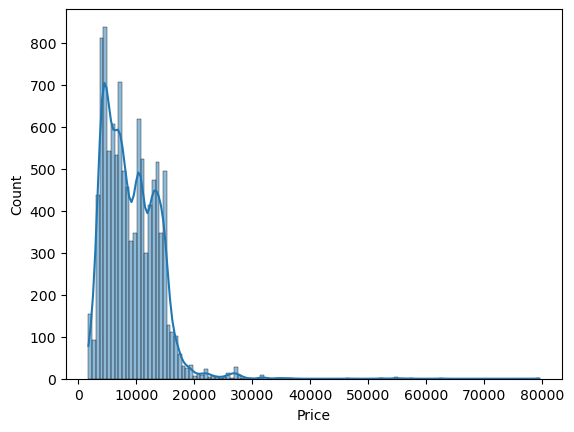

In [121]:
sns.histplot(df_train['Price'], kde=True)

<Axes: xlabel='Price', ylabel='Density'>

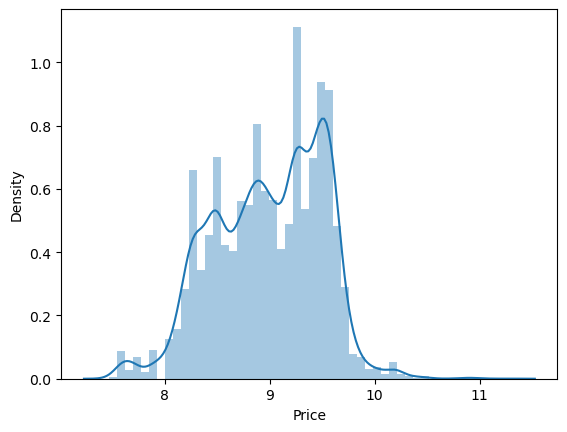

In [122]:
sns.distplot(np.log1p(df_train['Price']))

### X and Y split

In [123]:
X = df_train.drop(columns=['Price'])
y = np.log1p(df_train['Price']) #natural logarithm of the price

In [124]:
X

,Airline,Source,Destination,Total_Stops,Route_Popularity,Journey_Day,Journey_Month,Journey_Weekday,Dep_Part_of_Day,Arrival_Part_of_Day,Duration_Minutes
0,IndiGo,Banglore,Delhi,0,1552,24,3,6,Night,Night,170
1,Air India,Kolkata,Banglore,2,6,1,5,2,Morning,Afternoon,445
2,Jet Airways,Delhi,Cochin,2,41,9,6,6,Morning,Night,1140
3,IndiGo,Kolkata,Banglore,1,9,12,5,6,Evening,Night,325
4,IndiGo,Banglore,Delhi,1,3,1,3,4,Afternoon,Night,285
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,724,9,4,1,Evening,Night,150
10679,Air India,Kolkata,Banglore,0,724,27,4,5,Evening,Night,155
10680,Jet Airways,Banglore,Delhi,0,1552,27,4,5,Morning,Morning,180
10681,Vistara,Banglore,Delhi,0,1552,1,3,4,Morning,Afternoon,160


In [125]:
y

0        8.268219
1        8.944159
2        9.538420
3        8.735364
4        9.495745
           ...   
10678    8.320692
10679    8.329899
10680    8.885994
10681    9.445333
10682    9.371949
Name: Price, Length: 10682, dtype: float64

### Train Test split

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [134]:
X_train

,Airline,Source,Destination,Total_Stops,Route_Popularity,Journey_Day,Journey_Month,Journey_Weekday,Dep_Part_of_Day,Arrival_Part_of_Day,Duration_Minutes
10005,Multiple carriers,Delhi,Cochin,1,2376,27,5,0,Morning,Evening,645
3684,Jet Airways,Delhi,Cochin,1,2376,9,5,3,Morning,Afternoon,1505
1034,SpiceJet,Delhi,Cochin,1,146,24,4,2,Afternoon,Night,380
3909,Multiple carriers,Delhi,Cochin,1,2376,21,3,3,Afternoon,Night,765
3088,Air India,Delhi,Cochin,2,56,24,6,0,Evening,Evening,1560
...,...,...,...,...,...,...,...,...,...,...,...
5734,Jet Airways,Delhi,Cochin,1,2376,27,3,2,Morning,Night,1165
5191,Jet Airways,Kolkata,Banglore,1,979,9,5,3,Afternoon,Evening,400
5390,Multiple carriers,Delhi,Cochin,1,2376,15,5,2,Afternoon,Night,760
860,IndiGo,Banglore,Delhi,0,1552,3,3,6,Night,Night,165


In [135]:
X_train['Airline'].value_counts()

Jet Airways          3056
IndiGo               1677
Air India            1396
Multiple carriers     967
SpiceJet              647
Vistara               383
Air Asia              256
GoAir                 162
Trujet                  1
Name: Airline, dtype: int64

### Separating the data into numerical andd categorical features

In [136]:
# Identify numerical features (dtype includes int64 and float64)
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical features (dtype includes object and category)
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Print feature lists
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['Route_Popularity', 'Journey_Day', 'Journey_Month', 'Journey_Weekday']
Categorical Features: ['Airline', 'Source', 'Destination', 'Dep_Part_of_Day', 'Arrival_Part_of_Day']


### Model training and validation

In [151]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

### Linear Regression

In [138]:
# Define the ColumnTransformer and Pipeline
step1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ],
    remainder='passthrough'
)


step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Calculate R² score and MAE on the training data
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R² score and MAE on the test data
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the adjusted R² score
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print the results
print('Training R² score:', r2_train)
print('Training Adjusted R² score:', adjusted_r2_train)
print('Training MAE:', mae_train)
print("*"*30)
print('Test R² score:', r2_test)
print('Test Adjusted R² score:', adjusted_r2_test)
print('Test MAE:', mae_test)

Training R² score: 0.719381352734397
Training Adjusted R² score: 0.7190196036285816
Training MAE: 0.20394583294153362
******************************
Test R² score: 0.7219852532046656
Test Adjusted R² score: 0.7205461180447839
Test MAE: 0.20524738715208096


### Ridge regression

In [139]:
# Define the ColumnTransformer and Pipeline
step1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ],
    remainder='passthrough'
)



step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Calculate R² score and MAE on the training data
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R² score and MAE on the test data
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the adjusted R² score
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print the results
print('Training R² score:', r2_train)
print('Training Adjusted R² score:', adjusted_r2_train)
print('Training MAE:', mae_train)
print("*"*30)
print('Test R² score:', r2_test)
print('Test Adjusted R² score:', adjusted_r2_test)
print('Test MAE:', mae_test)

Training R² score: 0.7202444690143222
Training Adjusted R² score: 0.7198838325627995
Training MAE: 0.20320823335978555
******************************
Test R² score: 0.7245467659411935
Test Adjusted R² score: 0.7231208903766537
Test MAE: 0.20384390289736717


### Decision Tree Regression

In [140]:
# Define the ColumnTransformer and Pipeline
step1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ],
    remainder='passthrough'
)


step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Calculate R² score and MAE on the training data
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R² score and MAE on the test data
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the adjusted R² score
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print the results
print('Training R² score:', r2_train)
print('Training Adjusted R² score:', adjusted_r2_train)
print('Training MAE:', mae_train)
print("*"*30)
print('Test R² score:', r2_test)
print('Test Adjusted R² score:', adjusted_r2_test)
print('Test MAE:', mae_test)

Training R² score: 0.8672685277760257
Training Adjusted R² score: 0.8670974219287898
Training MAE: 0.13568615375037352
******************************
Test R² score: 0.8410718798808138
Test Adjusted R² score: 0.8402491931413733
Test MAE: 0.14795279364405628


### SVR

In [141]:
# Define the ColumnTransformer and Pipeline
step1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ],
    remainder='passthrough'
)


step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Calculate R² score and MAE on the training data
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R² score and MAE on the test data
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the adjusted R² score
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print the results
print('Training R² score:', r2_train)
print('Training Adjusted R² score:', adjusted_r2_train)
print('Training MAE:', mae_train)
print("*"*30)
print('Test R² score:', r2_test)
print('Test Adjusted R² score:', adjusted_r2_test)
print('Test MAE:', mae_test)

Training R² score: 0.745986961348807
Training Adjusted R² score: 0.7456595098750975
Training MAE: 0.1876728793002719
******************************
Test R² score: 0.7417398613624908
Test Adjusted R² score: 0.7404029853507201
Test MAE: 0.19260171321846056


### KNN

In [143]:
# Define the ColumnTransformer and Pipeline
step1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ],
    remainder='passthrough'
)



step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Calculate R² score and MAE on the training data
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R² score and MAE on the test data
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the adjusted R² score
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print the results
print('Training R² score:', r2_train)
print('Training Adjusted R² score:', adjusted_r2_train)
print('Training MAE:', mae_train)
print("*"*30)
print('Test R² score:', r2_test)
print('Test Adjusted R² score:', adjusted_r2_test)
print('Test MAE:', mae_test)

AttributeError: 'NoneType' object has no attribute 'split'

### Random Forest

In [144]:
# Define the ColumnTransformer and Pipeline
step1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ],
    remainder='passthrough'
)



step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Calculate R² score and MAE on the training data
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R² score and MAE on the test data
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the adjusted R² score
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print the results
print('Training R² score:', r2_train)
print('Training Adjusted R² score:', adjusted_r2_train)
print('Training MAE:', mae_train)
print("*"*30)
print('Test R² score:', r2_test)
print('Test Adjusted R² score:', adjusted_r2_test)
print('Test MAE:', mae_test)

Training R² score: 0.937739643986376
Training Adjusted R² score: 0.9376593833610215
Training MAE: 0.08826308309727521
******************************
Test R² score: 0.8876462841777556
Test Adjusted R² score: 0.8870646884723228
Test MAE: 0.12204389030214274


### Random Trees

In [145]:
# Define the ColumnTransformer and Pipeline
step1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ],
    remainder='passthrough'
)



step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                              bootstrap=True)
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Calculate R² score and MAE on the training data
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R² score and MAE on the test data
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the adjusted R² score
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print the results
print('Training R² score:', r2_train)
print('Training Adjusted R² score:', adjusted_r2_train)
print('Training MAE:', mae_train)
print("*"*30)
print('Test R² score:', r2_test)
print('Test Adjusted R² score:', adjusted_r2_test)
print('Test MAE:', mae_test)

Training R² score: 0.9313427412942678
Training Adjusted R² score: 0.9312542343394145
Training MAE: 0.09331472813884248
******************************
Test R² score: 0.8865131162708733
Test Adjusted R² score: 0.885925654755099
Test MAE: 0.12427135034469575


### AdaBoost

In [146]:
# Define the ColumnTransformer and Pipeline
step1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ],
    remainder='passthrough'
)




step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Calculate R² score and MAE on the training data
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R² score and MAE on the test data
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the adjusted R² score
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print the results
print('Training R² score:', r2_train)
print('Training Adjusted R² score:', adjusted_r2_train)
print('Training MAE:', mae_train)
print("*"*30)
print('Test R² score:', r2_test)
print('Test Adjusted R² score:', adjusted_r2_test)
print('Test MAE:', mae_test)

Training R² score: 0.7081935947512874
Training Adjusted R² score: 0.7078174233628267
Training MAE: 0.22484001052129468
******************************
Test R² score: 0.7147952021083788
Test Adjusted R² score: 0.7133188478604693
Test MAE: 0.22374871312301017


### Gradient Boosting

In [147]:
# Define the ColumnTransformer and Pipeline
step1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ],
    remainder='passthrough'
)


step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Calculate R² score and MAE on the training data
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R² score and MAE on the test data
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the adjusted R² score
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print the results
print('Training R² score:', r2_train)
print('Training Adjusted R² score:', adjusted_r2_train)
print('Training MAE:', mae_train)
print("*"*30)
print('Test R² score:', r2_test)
print('Test Adjusted R² score:', adjusted_r2_test)
print('Test MAE:', mae_test)

Training R² score: 0.888673526292327
Training Adjusted R² score: 0.8885300139038605
Training MAE: 0.12848440958918184
******************************
Test R² score: 0.8848629126195076
Test Adjusted R² score: 0.8842669088730674
Test MAE: 0.13320213836683006


In [148]:
from sklearn.ensemble import VotingRegressor,StackingRegressor


### Voting Regressor

In [149]:
# Define the ColumnTransformer and Pipeline
step1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ],
    remainder='passthrough'
)



rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15,bootstrap=True)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Calculate R² score and MAE on the training data
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R² score and MAE on the test data
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the adjusted R² score
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print the results
print('Training R² score:', r2_train)
print('Training Adjusted R² score:', adjusted_r2_train)
print('Training MAE:', mae_train)
print("*"*30)
print('Test R² score:', r2_test)
print('Test Adjusted R² score:', adjusted_r2_test)
print('Test MAE:', mae_test)

NameError: name 'XGBRegressor' is not defined